In [975]:
# @title Loading libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix


In [976]:
# @title Loading Data
file_path_csv = 'youth_data.csv'
youth_data = pd.read_csv(file_path_csv)
youth_data.head()

iralcfy  irmjfy  ircigfm  IRSMKLSS30N  iralcfm  irmjfm  ircigage  \
0      993     991       91           91     93.0    91.0       991   
1      991     991       91           91     91.0    91.0       991   
2      993     993       93           91     93.0    93.0        13   
3      991     991       91           91     91.0    91.0       991   
4      991     991       91           91     91.0    91.0       991   

   irsmklsstry  iralcage  irmjage  ...  eduschlgo  EDUSCHGRD2  eduskpcom  \
0          991        12      991  ...          1           5          0   
1          991       991      991  ...          1           5          0   
2          991        13       13  ...          1           4          0   
3          991       991      991  ...          1           7          0   
4          991       991      991  ...          1           3          0   

   imother  ifather  income  govtprog  POVERTY3  PDEN10  COUTYP4  
0        1        1       4         2         3       2        2  
1        1        1       4         2         3       1        1  
2        1        1       4         1         3       1        1  
3        1        1       2         2         1       2        2  
4        1        1       4         2         3       2        2  

[5 rows x 79 columns]

In [977]:
# @title Verifying the shape of the dataframe
youth_data.shape

(5500, 79)

In [978]:
# @title There are 5500 records and 79 variables. Now, I want to map all variables to their questions in the codebook, to understand the variables.

"""
'iralcfy': ALCOHOL FREQUENCY PAST YEAR
'irmjfy': MARIJUANA FREQUENCY PAST YEAR
'ircigfm': CIG FREQUENCY PAST MONTH
'IRSMKLSS30N': SMOKELESS TOBACCO FREQUENCY PAST MONTH
'iralcfm': ALCOHOL FREQUENCY PAST MONTH
'irmjfm': MARIJUANA FREQUENCY PAST MONTH
'ircigage': CIGARETTE AGE OF FIRST USE
'irsmklsstry': SMOKELESS TOBACCO AGE OF FIRST USE
'iralcage': ALCOHOL AGE OF FIRST USE -
'irmjage': MARIJUANA AGE OF FIRST USE
'mrjflag': MARIJUANA - EVER USED
'alcflag': ILLICIT DRUG, TOBACCO PRD, OR ALCOHOL - EVER USED
'tobflag': ANY TOBACCO - EVER USED
'alcydays': # OF DAYS USED ALCOHOL IN PAST YEAR
'mrjydays': # OF DAYS USED MARIJUANA IN PAST YEAR
'alcmdays': # OF DAYS USED ALCOHOL IN PAST MONTH
'mrjmdays': # OF DAYS USED MARIJUANA IN PAST MONTH
'cigmdays': # OF DAYS USED CIGARETTES IN PAST MONTH
'smklsmdays': # OF DAYS USED SMOKELESS TOBACCO IN PAST MONTH
'schfelt': HOW YTH FELT: ABOUT GOING TO SCHOOL IN PST YR
'tchgjob': TEACHER LET YTH KNOW DOING GOOD JOB IN PST YR
'avggrade': GRADE AVERAGE FOR LAST GRADING PERIOD COMPLETED
'stndscig': STUDENTS IN YTH GRADE SMOKE CIGARETTES
'stndsmj':  STUDENTS IN YTH GRADE USE MARIJUANA
'stndalc': STUDENTS IN YTH GRADE DRINK ALCOHOLIC BEVERAGES
'stnddnk': PARENTS CHECK IF HOMEWORK DONE IN PST YR
'parchkhw': PARENTS CHECK IF HOMEWORK DONE IN PST YR
'parhlphw': PARENTS HELP WITH HOMEWORK IN PST YR
'PRCHORE2': PARENTS MAKE YTH DO CHORES AROUND HOUSE IN PST YR
'PRLMTTV2': PARENTS LIMIT AMOUNT OF TV IN PST YR
'parlmtsn': PARENTS LIMIT TIME OUT ON SCHOOL NIGHT IN PST YR
'PRGDJOB2': PARENTS TELL YTH HAD DONE GOOD JOB IN PST YR
'PRPROUD2': PARENTS TELL YTH PROUD OF THINGS DONE IN PST YR
'argupar': TIMES ARGUED/HAD A FIGHT WITH ONE PARENT IN PST YR
'YOFIGHT2': YOUTH HAD SERIOUS FIGHT AT SCHOOL/WORK
'YOGRPFT2': YOUTH FOUGHT WITH GROUP VS OTHER GROUP
'YOHGUN2': YOUTH CARRIED A HANDGUN
'YOSELL2': YOUTH SOLD ILLEGAL DRUGS
'YOSTOLE2': YOUTH STOLE/TRIED TO STEAL ITEM >$50
'YOATTAK2': YOUTH ATTACKED WITH INTENT TO SERIOUSLY HARM
'PRPKCIG2': YTH THINK: PARENTS FEEL ABT YTH SMOKE PACK CIG/DAY
'PRMJEVR2': YTH THINK: PARENTS FEEL ABT YTH TRY MARIJUANA
'prmjmo': YTH THINK: PARENTS FEEL ABT YTH USE MARIJUANA MNTHLY
'PRALDLY2': YTH THINK: PARNTS FEEL ABT YTH DRK 1-2 ALC BEV/DAY
'YFLPKCG2': HOW YTH FEELS: PEERS SMOKE PACK/DAY CIG
'YFLTMRJ2': HOW YTH FEELS: PEERS TRY MARIJUANA
'yflmjmo': HOW YTH FEELS: PEERS USING MARIJUANA MONTHLY
'YFLADLY2': HOW YTH FEELS: PEERS DRNK 1-2 ALC BEV/DAY
'FRDPCIG2': YTH THINK: CLSE FRND FEEL ABT YTH SMK 1+ PAC DAILY
'FRDMEVR2': YTH THINK: CLOSE FRNDS FEEL ABT YTH TRY MARIJUANA
'frdmjmon': YTH THINK: CLSE FRNDS FEEL ABT YTH USE MARIJUANA MON
'FRDADLY2': YTH THINK: CLSE FRND FEEL ABT YTH HAVE 1-2 ALC/DAY
'talkprob': WHO YTH TALKS WITH ABOUT SERIOUS PROBLEMS
'PRTALK3': TALKED WITH PARENT ABOUT DANGER TOB/ALC/DRG
'PRBSOLV2': PARTICIPATED IN PRBSLV/COMMSKILL/SELFESTEEM GROUP
'PREVIOL2': PARTICIPATED IN VIOLENCE PREVENTION PROGRAM
'PRVDRGO2': PARTICIPATED IN SUBSTANCE PREV PROGRAM OUTSIDE SCHOOL
'GRPCNSL2': PARTICIPATED IN PROGRAM TO HELP SUBSTANCE USE
'PREGPGM2': PARTICIPATED IN PREG/STD PREVENTION PROGRAM
'YTHACT2': YTH PARTICIPATED IN YOUTH ACTIVITIES
'DRPRVME3': YTH SEEN ALC OR DRUG PREVENTION MESSAGE OUTSIDE SCHOOL
'ANYEDUC3': YTH HAD ANY DRUG OR ALCOHOL EDUCATION IN SCHOOL
'rlgattd': NUMBER TIMES ATTEND RELIGIOUS SERVICES IN PST YR
'rlgimpt': RELIGIOUS BELIEFS VERY IMPORTANT IN LIFE
'rlgdcsn': RELIGIOUS BELIEFS INFLUENCE LIFE DECISIONS
'rlgfrnd': IMPORTANT FOR FRIENDS TO SHARE RELIGIOUS BELIEFS
'irsex': IMPUTATION REVISED GENDER
'NEWRACE2': RACE/HISPANICITY RECODE (7 LEVELS)
'HEALTH2': OVERALL HEALTH RECODE
'eduschlgo': NOW GOING TO SCHOOL
'EDUSCHGRD2': WHAT GRADE IN NOW/WILL BE IN
'eduskpcom': HOW MANY DAYS MISSED SCHOOL FROM SKIPPING (COMBINED)
'imother': MOTHER IN HH
'ifather': FATHER IN HH
'income': TOTAL FAMILY INCOME RECODE
'govtprog': PARTICIPATED IN ONE OR MORE GOVT ASSIST PROGRAMS
'POVERTY3': POVERTY LEVEL (% OF US CENSUS POVERTY THRESHOLD)
'PDEN10': POPULATION DENSITY 2010 - THREE LEVELS
'COUTYP4': COUNTY METRO/NONMETRO STATUS (2013 3-LEVEL)
"""
print('')

In [979]:
# @title I'm going to seggregate the columns based on their categories like related to Alcohol, Marijuana, etc.

## FAMILY 15 cols
'''
'imother': MOTHER IN HH
'ifather': FATHER IN HH
'income': TOTAL FAMILY INCOME RECODE
'govtprog': PARTICIPATED IN ONE OR MORE GOVT ASSIST PROGRAMS
'POVERTY3': POVERTY LEVEL (% OF US CENSUS POVERTY THRESHOLD)
'PDEN10': POPULATION DENSITY 2010 - THREE LEVELS
'COUTYP4': COUNTY METRO/NONMETRO STATUS (2013 3-LEVEL)
'NEWRACE2': RACE/HISPANICITY RECODE (7 LEVELS)
'talkprob': WHO YTH TALKS WITH ABOUT SERIOUS PROBLEMS
'rlgattd': NUMBER TIMES ATTEND RELIGIOUS SERVICES IN PST YR
'rlgimpt': RELIGIOUS BELIEFS VERY IMPORTANT IN LIFE
'rlgdcsn': RELIGIOUS BELIEFS INFLUENCE LIFE DECISIONS
'rlgfrnd': IMPORTANT FOR FRIENDS TO SHARE RELIGIOUS BELIEFS
'irsex': IMPUTATION REVISED GENDER
'HEALTH2': OVERALL HEALTH RECODE
'''

## SCHOOL 8 cols

'''
'schfelt': HOW YTH FELT: ABOUT GOING TO SCHOOL IN PST YR
'tchgjob': TEACHER LET YTH KNOW DOING GOOD JOB IN PST YR
'avggrade': GRADE AVERAGE FOR LAST GRADING PERIOD COMPLETED
'ANYEDUC3': YTH HAD ANY DRUG OR ALCOHOL EDUCATION IN SCHOOL
'DRPRVME3': YTH SEEN ALC OR DRUG PREVENTION MESSAGE OUTSIDE SCHOOL
'eduschlgo': NOW GOING TO SCHOOL
'eduskpcom': HOW MANY DAYS MISSED SCHOOL FROM SKIPPING (COMBINED)
'EDUSCHGRD2': WHAT GRADE IN NOW/WILL BE IN
'''

## PARENTS 10 cols
'''
'stnddnk': PARENTS CHECK IF HOMEWORK DONE IN PST YR
'parchkhw': PARENTS CHECK IF HOMEWORK DONE IN PST YR
'parhlphw': PARENTS HELP WITH HOMEWORK IN PST YR
'PRCHORE2': PARENTS MAKE YTH DO CHORES AROUND HOUSE IN PST YR
'PRLMTTV2': PARENTS LIMIT AMOUNT OF TV IN PST YR
'parlmtsn': PARENTS LIMIT TIME OUT ON SCHOOL NIGHT IN PST YR
'PRGDJOB2': PARENTS TELL YTH HAD DONE GOOD JOB IN PST YR
'PRPROUD2': PARENTS TELL YTH PROUD OF THINGS DONE IN PST YR
'argupar': TIMES ARGUED/HAD A FIGHT WITH ONE PARENT IN PST YR
'PRTALK3': TALKED WITH PARENT ABOUT DANGER TOB/ALC/DRG
'''

## CIGARETTE 7 cols

'''
'ircigfm': CIG FREQUENCY PAST MONTH
'ircigage': CIGARETTE AGE OF FIRST USE
'cigmdays': # OF DAYS USED CIGARETTES IN PAST MONTH
'stndscig': STUDENTS IN YTH GRADE SMOKE CIGARETTES
'PRPKCIG2': YTH THINK: PARENTS FEEL ABT YTH SMOKE PACK CIG/DAY
'YFLPKCG2': HOW YTH FEELS: PEERS SMOKE PACK/DAY CIG
'FRDPCIG2': YTH THINK: CLSE FRND FEEL ABT YTH SMK 1+ PAC DAILY
'''

## Alcohol 10 cols

'''
'iralcfy': ALCOHOL FREQUENCY PAST YEAR
'iralcfm': ALCOHOL FREQUENCY PAST MONTH
'iralcage': ALCOHOL AGE OF FIRST USE
'alcflag': ILLICIT DRUG, TOBACCO PRD, OR ALCOHOL - EVER USED
'alcydays': # OF DAYS USED ALCOHOL IN PAST YEAR
'alcmdays': # OF DAYS USED ALCOHOL IN PAST MONTH
'stndalc': STUDENTS IN YTH GRADE DRINK ALCOHOLIC BEVERAGES
'PRALDLY2': YTH THINK: PARNTS FEEL ABT YTH DRK 1-2 ALC BEV/DAY
'YFLADLY2': HOW YTH FEELS: PEERS DRNK 1-2 ALC BEV/DAY
'FRDADLY2': YTH THINK: CLSE FRND FEEL ABT YTH HAVE 1-2 ALC/DAY
'''

## Marijuana 13 cols

'''
'irmjfy': MARIJUANA FREQUENCY PAST YEAR
'irmjfm': MARIJUANA FREQUENCY PAST MONTH
'irmjage': MARIJUANA AGE OF FIRST USE
'mrjflag': MARIJUANA - EVER USED
'mrjydays': # OF DAYS USED MARIJUANA IN PAST YEAR
'mrjmdays': # OF DAYS USED MARIJUANA IN PAST MONTH
'stndsmj':  STUDENTS IN YTH GRADE USE MARIJUANA
'PRMJEVR2': YTH THINK: PARENTS FEEL ABT YTH TRY MARIJUANA
'prmjmo': YTH THINK: PARENTS FEEL ABT YTH USE MARIJUANA MNTHLY
'YFLTMRJ2': HOW YTH FEELS: PEERS TRY MARIJUANA
'yflmjmo': HOW YTH FEELS: PEERS USING MARIJUANA MONTHLY
'FRDMEVR2': YTH THINK: CLOSE FRNDS FEEL ABT YTH TRY MARIJUANA
'frdmjmon': YTH THINK: CLSE FRNDS FEEL ABT YTH USE MARIJUANA MON
'''

## tobacco 4 cols

'''
'IRSMKLSS30N': SMOKELESS TOBACCO FREQUENCY PAST MONTH
'irsmklsstry': SMOKELESS TOBACCO AGE OF FIRST USE
'tobflag': ANY TOBACCO - EVER USED
'smklsmdays': # OF DAYS USED SMOKELESS TOBACCO IN PAST MONTH
'''

## youth fights 6 cols

'''
'YOFIGHT2': YOUTH HAD SERIOUS FIGHT AT SCHOOL/WORK
'YOGRPFT2': YOUTH FOUGHT WITH GROUP VS OTHER GROUP
'YOHGUN2': YOUTH CARRIED A HANDGUN
'YOSELL2': YOUTH SOLD ILLEGAL DRUGS
'YOSTOLE2': YOUTH STOLE/TRIED TO STEAL ITEM > $50
'YOATTAK2': YOUTH ATTACKED WITH INTENT TO SERIOUSLY HARM
'''

## participation in activities 6 cols

'''
'PRBSOLV2': PARTICIPATED IN PRBSLV/COMMSKILL/SELFESTEEM GROUP
'PREVIOL2': PARTICIPATED IN VIOLENCE PREVENTION PROGRAM
'PRVDRGO2': PARTICIPATED IN SUBSTANCE PREV PROGRAM OUTSIDE SCHOOL
'GRPCNSL2': PARTICIPATED IN PROGRAM TO HELP SUBSTANCE USE
'PREGPGM2': PARTICIPATED IN PREG/STD PREVENTION PROGRAM
'YTHACT2': YTH PARTICIPATED IN YOUTH ACTIVITIES
'''


"\n'PRBSOLV2': PARTICIPATED IN PRBSLV/COMMSKILL/SELFESTEEM GROUP\n'PREVIOL2': PARTICIPATED IN VIOLENCE PREVENTION PROGRAM\n'PRVDRGO2': PARTICIPATED IN SUBSTANCE PREV PROGRAM OUTSIDE SCHOOL\n'GRPCNSL2': PARTICIPATED IN PROGRAM TO HELP SUBSTANCE USE\n'PREGPGM2': PARTICIPATED IN PREG/STD PREVENTION PROGRAM\n'YTHACT2': YTH PARTICIPATED IN YOUTH ACTIVITIES\n"

It is obvious that several factors could lead to youth doing substance abuse. And through this Machine Learning Analysis we'll try to predict:
1. Whether youth would consume alcohol or not? (Binary Classfiication)
2. Would youth consume Tobacco, Alcohol, Marijuana or nothing? (Multi class classification)
3. At what age would youth try Marijuana? (Regression)


Before we proceed, I'll clean the data further. So that our analysis is backed by good data and we can trust the insights more. This also helps in building the models.

Firstly, I want to make a new dataframe to only have columns that seem important or relevant based on their descriptions from the codebook.

Creating a dataframe of relevant columns related to youth's education status, drug use, family, religion and teachers:

In [980]:
df = youth_data[['iralcage', 'iralcfy', 'mrjflag', 'alcflag', 'tobflag',
 'eduskpcom', 'schfelt', 'parchkhw', 'PRPROUD2', 'argupar',
 'YOFIGHT2', 'PRGDJOB2', 'EDUSCHGRD2', 'rlgattd', 'rlgimpt',
 'rlgdcsn', 'rlgfrnd', 'PRTALK3', 'PRBSOLV2', 'tchgjob']].copy()

df.head()

iralcage  iralcfy  mrjflag  alcflag  tobflag  eduskpcom  schfelt  parchkhw  \
0        12      993        0        1        0          0        1       1.0   
1       991      991        0        0        0          0        1       1.0   
2        13      993        1        1        1          0        1       1.0   
3       991      991        0        0        0          0        1       1.0   
4       991      991        0        0        0          0        1       1.0   

   PRPROUD2  argupar  YOFIGHT2  PRGDJOB2  EDUSCHGRD2  rlgattd  rlgimpt  \
0       2.0      1.0       2.0       2.0           5      2.0      2.0   
1       1.0      1.0       2.0       1.0           5      2.0      2.0   
2       1.0      1.0       2.0       1.0           4      2.0      1.0   
3       1.0      1.0       2.0       1.0           7      2.0      1.0   
4       1.0      1.0       2.0       1.0           3      1.0      1.0   

   rlgdcsn  rlgfrnd  PRTALK3  PRBSOLV2  tchgjob  
0      2.0      2.0      2.0       2.0      1.0  
1      2.0      2.0      1.0       2.0      1.0  
2      1.0      1.0      2.0       2.0      1.0  
3      1.0      2.0      1.0       2.0      1.0  
4      1.0      1.0      NaN       2.0      1.0

Let's rename the columns names for better understanding and to make readable plots.

In [981]:
col_names = {
    'iralcage': 'age_of_first_alcohol_use',
    'iralcfy': 'alcohol_frequency_past_year',
    'mrjflag': 'marijuana_ever_tried_flag',
    'alcflag': 'alcohol_ever_tried_flag',
    'tobflag': 'tobacco_ever_tried_flag',
    'eduskpcom': 'no_of_days_missed_school_from_skipping',
    'schfelt': 'how_youth_feels_about_school_past_year',
    'parchkhw': 'parents_monitors_homework_past_year',
    'PRPROUD2': 'parents_show_pride_past_year',
    'argupar': 'argued_or_fought_with_parents_past_year',
    'YOFIGHT2': 'youth_serious_fight_school_work',
    'PRGDJOB2': 'parents_praises_youth_past_year',
    'EDUSCHGRD2': 'youth_education_flag',
    'rlgattd': 'no_of_times_attended_religious_services_past_year',
    'rlgimpt': 'importance_of_religious_beliefs',
    'rlgdcsn': 'impact_of_religious_beliefs_on_life_decisions',
    'rlgfrnd': 'importance_of_friends_sharing_religious_beliefs',
    'PRTALK3': 'talked_about_dangers_of_substance_use_with_parent',
    'PRBSOLV2': 'participated_skill_development_group_program',
    'tchgjob': 'teacher_praised_youth_past_year',
}
df = df.rename(columns=col_names)
df.head()

age_of_first_alcohol_use  alcohol_frequency_past_year  \
0                        12                          993   
1                       991                          991   
2                        13                          993   
3                       991                          991   
4                       991                          991   

   marijuana_ever_tried_flag  alcohol_ever_tried_flag  \
0                          0                        1   
1                          0                        0   
2                          1                        1   
3                          0                        0   
4                          0                        0   

   tobacco_ever_tried_flag  no_of_days_missed_school_from_skipping  \
0                        0                                       0   
1                        0                                       0   
2                        1                                       0   
3                        0                                       0   
4                        0                                       0   

   how_youth_feels_about_school_past_year  \
0                                       1   
1                                       1   
2                                       1   
3                                       1   
4                                       1   

   parents_monitors_homework_past_year  parents_show_pride_past_year  \
0                                  1.0                           2.0   
1                                  1.0                           1.0   
2                                  1.0                           1.0   
3                                  1.0                           1.0   
4                                  1.0                           1.0   

   argued_or_fought_with_parents_past_year  youth_serious_fight_school_work  \
0                                      1.0                              2.0   
1                                      1.0                              2.0   
2                                      1.0                              2.0   
3                                      1.0                              2.0   
4                                      1.0                              2.0   

   parents_praises_youth_past_year  youth_education_flag  \
0                              2.0                     5   
1                              1.0                     5   
2                              1.0                     4   
3                              1.0                     7   
4                              1.0                     3   

   no_of_times_attended_religious_services_past_year  \
0                                                2.0   
1                                                2.0   
2                                                2.0   
3                                                2.0   
4                                                1.0   

   importance_of_religious_beliefs  \
0                              2.0   
1                              2.0   
2                              1.0   
3                              1.0   
4                              1.0   

   impact_of_religious_beliefs_on_life_decisions  \
0                                            2.0   
1                                            2.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   

   importance_of_friends_sharing_religious_beliefs  \
0                                              2.0   
1                                              2.0   
2                                              1.0   
3                                              2.0   
4                                              1.0   

   talked_about_dangers_of_substance_use_with_parent  \
0                                                2.0   
1                     

youth_education_flag: simplifying the EDUSCHGRD2 column that has grade levels, to make it a flag of whether youth has been to school or not.

In [982]:
df['youth_education_flag'].value_counts()

youth_education_flag
4     869
5     828
3     823
6     818
7     707
99    667
8     394
2     281
98     81
1      22
9       8
10      2
Name: count, dtype: int64

In [983]:
# @title making the variable binary by combining all grades(went to school) into one value 1 and respone 99 as 0(didn't go to school)
df['youth_education_flag'] = df['youth_education_flag'].replace(to_replace=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], value=1)
df['youth_education_flag'] = df['youth_education_flag'].replace(to_replace=[99], value=0)

In [984]:
df['youth_education_flag'].value_counts()

youth_education_flag
1     4752
0      667
98      81
Name: count, dtype: int64

There are 81 people who didn't answer about their education. This might influence the model. So I want to replace these values with NaN. And later perform imputation on it.

In [985]:
# Recoding the '98' values in 'youth_education_flag' to NaN for imputation
df['youth_education_flag'] = df['youth_education_flag'].replace(98, np.nan)

# Verify the recoding
education_flag_counts = df['youth_education_flag'].value_counts(dropna=False)

education_flag_counts

youth_education_flag
1.0    4752
0.0     667
NaN      81
Name: count, dtype: int64

In [986]:
# @title Checking for missing values

missing_values = df.isnull().sum()
missing_values

age_of_first_alcohol_use                               0
alcohol_frequency_past_year                            0
marijuana_ever_tried_flag                              0
alcohol_ever_tried_flag                                0
tobacco_ever_tried_flag                                0
no_of_days_missed_school_from_skipping                 0
how_youth_feels_about_school_past_year                 0
parents_monitors_homework_past_year                   19
parents_show_pride_past_year                          21
argued_or_fought_with_parents_past_year               87
youth_serious_fight_school_work                       23
parents_praises_youth_past_year                       22
youth_education_flag                                  81
no_of_times_attended_religious_services_past_year    135
importance_of_religious_beliefs                      120
impact_of_religious_beliefs_on_life_decisions        131
importance_of_friends_sharing_religious_beliefs      153
talked_about_dangers_of_substan

Let's vosualize this to get a better view of the missing values

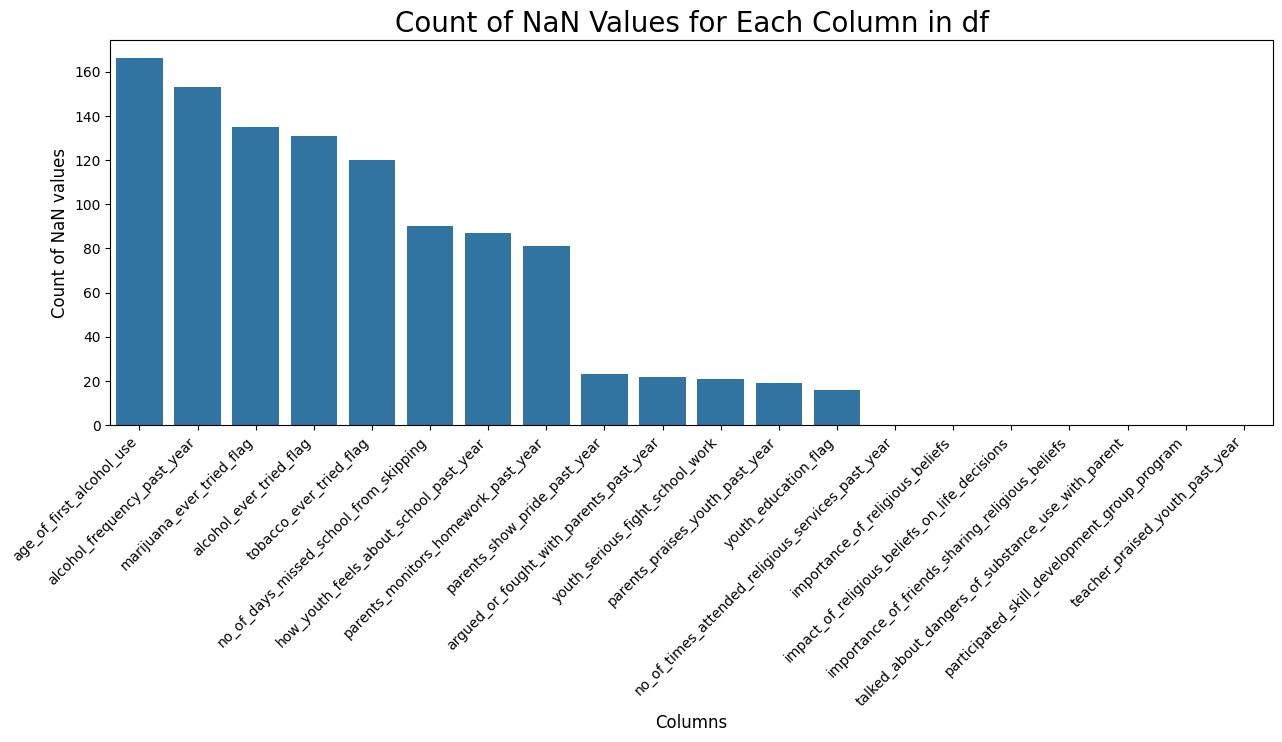

In [987]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df.columns, y=df.isnull().sum().sort_values(ascending = False))
plt.title('Count of NaN Values for Each Column in df', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count of NaN values', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.show()

Missing values doesn't seem to be a big problem in our dataset, let's look into it more closely.

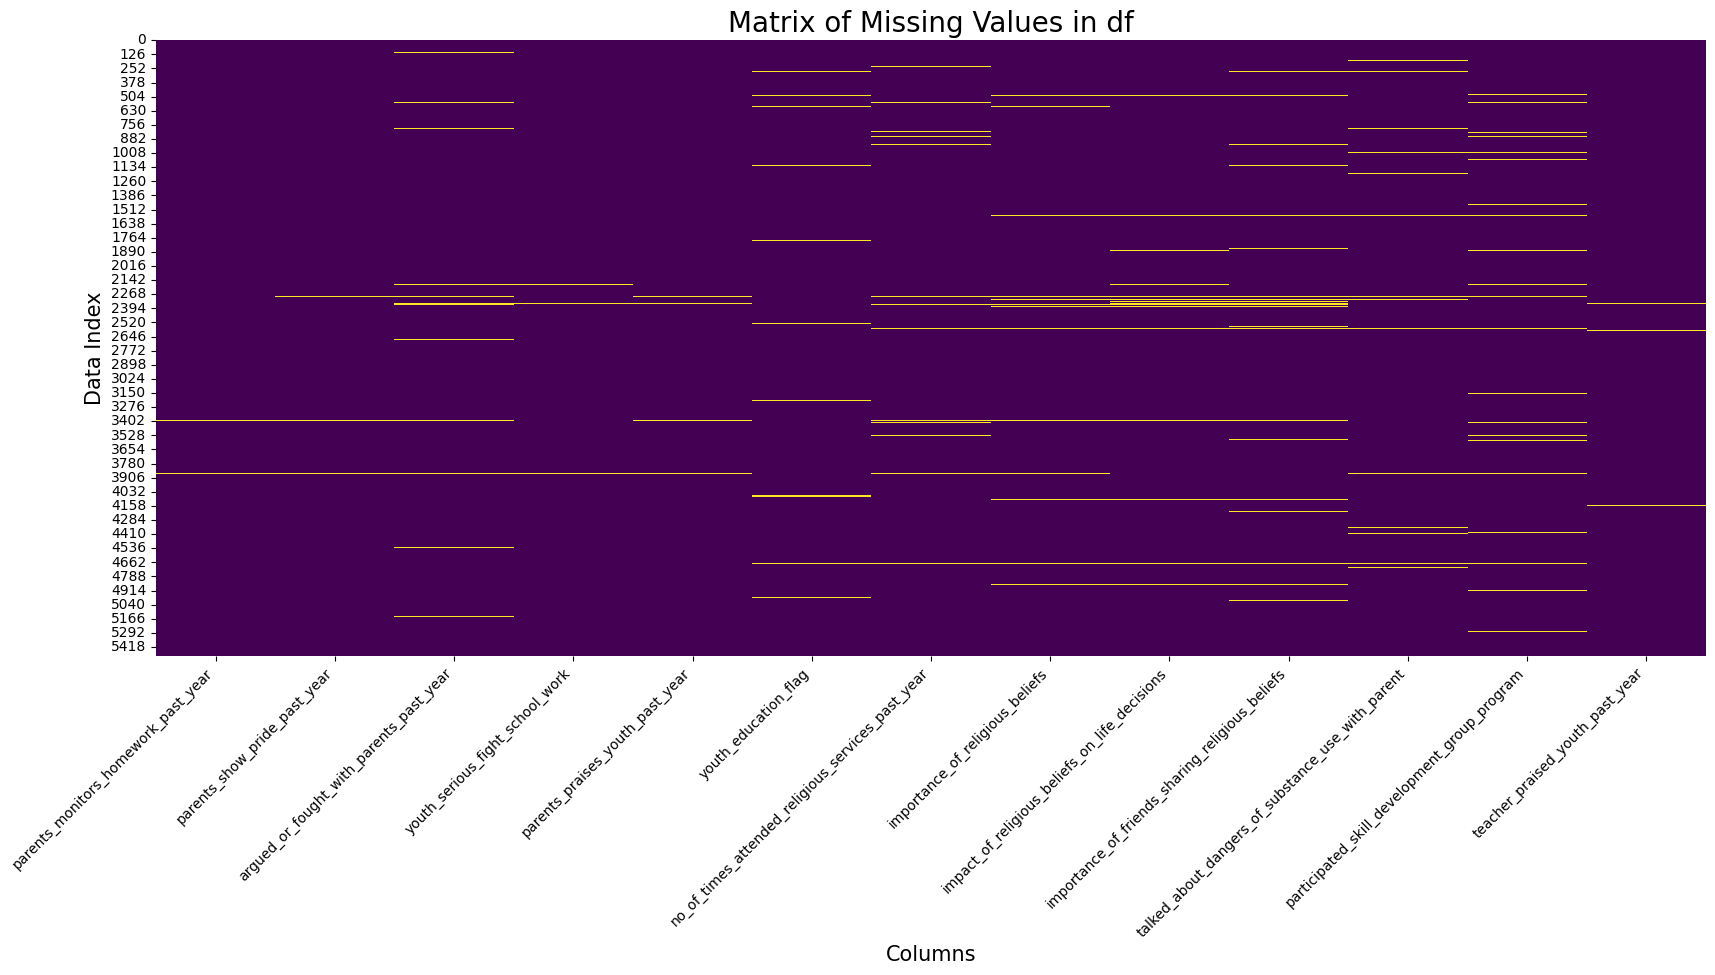

In [988]:
# First we will filter out the columns that have missing values, we don't need to analyse all columns.
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

plt.figure(figsize=(20, 8))
sns.heatmap(df[columns_with_missing_values].isnull(), cbar=False, cmap='viridis')
plt.title('Matrix of Missing Values in df', fontsize=20)
plt.xlabel('Columns', fontsize=15)
plt.ylabel('Data Index', fontsize=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

- The matrix plot shows a non-random pattern of missingness for certain records and this could be a sign that the data are missing not at random(MNAR) or at least missing at random(MAR), but with some structure. This means that the probability of missing data on certain variables is influenced by other variables in the data.
- Cases when data has structured missingness, simple imputation techniques can introduce bias. So I want to explore other imputation methods.

- But first, let's also verify this pattern using a heatmap. Because heatmaps are good at showing correlations.



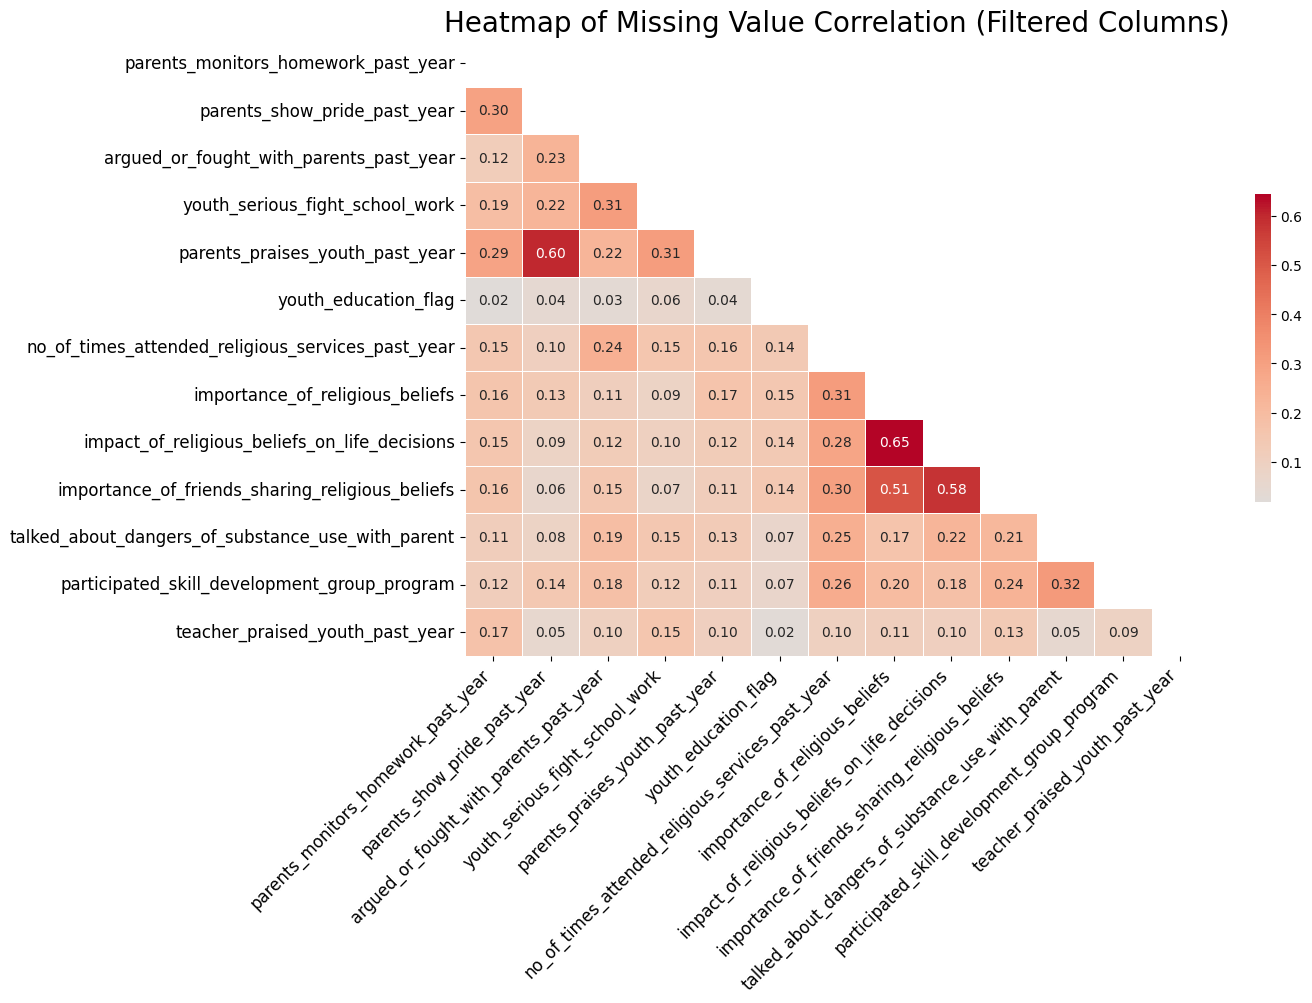

In [989]:
# Now, calculate the correlation matrix only for columns with missing values
missing_corr_filtered = df[columns_with_missing_values].isnull().corr()

# Create the mask for the upper triangle
mask_filtered = np.triu(np.ones_like(missing_corr_filtered, dtype=bool))

# Plotting the heatmap for the filtered correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(missing_corr_filtered, mask=mask_filtered, cmap='coolwarm', center=0,
            annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Heatmap of Missing Value Correlation (Filtered Columns)', fontsize=20)
plt.show()


Strong correlation between:

- impact_of_religious_beliefs_on_life_decisions and importance_of_friends_sharing_religious_beliefs
-  parents_show_pride_past_year and parents_praises_youth_past_year

In [990]:
# @title addressing the missing values using imputation

imputer = SimpleImputer(strategy="constant")

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

missing_values = df_imputed.isnull().sum()
missing_values

age_of_first_alcohol_use                             0
alcohol_frequency_past_year                          0
marijuana_ever_tried_flag                            0
alcohol_ever_tried_flag                              0
tobacco_ever_tried_flag                              0
no_of_days_missed_school_from_skipping               0
how_youth_feels_about_school_past_year               0
parents_monitors_homework_past_year                  0
parents_show_pride_past_year                         0
argued_or_fought_with_parents_past_year              0
youth_serious_fight_school_work                      0
parents_praises_youth_past_year                      0
youth_education_flag                                 0
no_of_times_attended_religious_services_past_year    0
importance_of_religious_beliefs                      0
impact_of_religious_beliefs_on_life_decisions        0
importance_of_friends_sharing_religious_beliefs      0
talked_about_dangers_of_substance_use_with_parent    0
participat

Since we need to convert multiple columns to categorical variables and do one-hot-encoding. I'll be using these basic functions to make it easier to convert multiple variables.
- **convert_to_category**
- **one_hot_encoding**

I'm using the **find_unique_count_and_plot** function to get a clear picture of each variable and compare it against the response variable.

In [991]:
# Function to find unique count and plot distribution of a categorical variable
def find_unique_count_and_plot(frame, column, response=None):
    print(f"Number of unique values in '{column}': {frame[column].nunique()}")
    print(f"Count of each value in '{column}':\n{frame[column].value_counts()}")

    # If response variable is provided, plotting the distribution of the column against the response
    if response is not None:
        sns.catplot(data=frame, x=response, hue=column, kind='count', palette="pastel", edgecolor=".6")
        plt.title(f"Distribution of {column} by {response}")
        plt.show()

# Function to convert specified columns to 'category' dtype
def convert_to_category(dataframe, col_names):
    # for col in cols:
      # print(dataframe[col])
    dataframe[col_names.drop('alcohol_ever_tried_flag')] = dataframe[col_names.drop('alcohol_ever_tried_flag')].astype('category')

      # dataframe[col] = dataframe[col].astype('category')
    return dataframe

#function to convert categorical variable into one hot encoded values
def one_hot_encoding(dataframe, col_name):
    dummy = pd.get_dummies(dataframe[[col_name]])
    res = pd.concat([dataframe, dummy ], axis=1)
    res.drop(col_name,inplace = True,axis = 1)
    return(res)


In [992]:
# @title Creating separate df for binary classification

# df_bc - df for binary classification

df_bc = df_imputed[['how_youth_feels_about_school_past_year', 'teacher_praised_youth_past_year', 'youth_education_flag',
                    'no_of_days_missed_school_from_skipping', 'talked_about_dangers_of_substance_use_with_parent',
                    'participated_skill_development_group_program', 'no_of_times_attended_religious_services_past_year',
                    'importance_of_religious_beliefs', 'impact_of_religious_beliefs_on_life_decisions',
                    'importance_of_friends_sharing_religious_beliefs', 'parents_praises_youth_past_year',
                    'youth_serious_fight_school_work', 'argued_or_fought_with_parents_past_year',
                    'parents_show_pride_past_year','parents_monitors_homework_past_year','alcohol_ever_tried_flag'
                    ]].copy()

I looked at the unique values of each column using **find_unique_count_and_plot** function, and noticed that 13 of them have two classes 1 or 2, so I want them to be 0 or 1 for better readability and consistency throughout the dataset.


Number of unique values in 'how_youth_feels_about_school_past_year': 2
Count of each value in 'how_youth_feels_about_school_past_year':
how_youth_feels_about_school_past_year
0.0    3981
1.0    1519
Name: count, dtype: int64


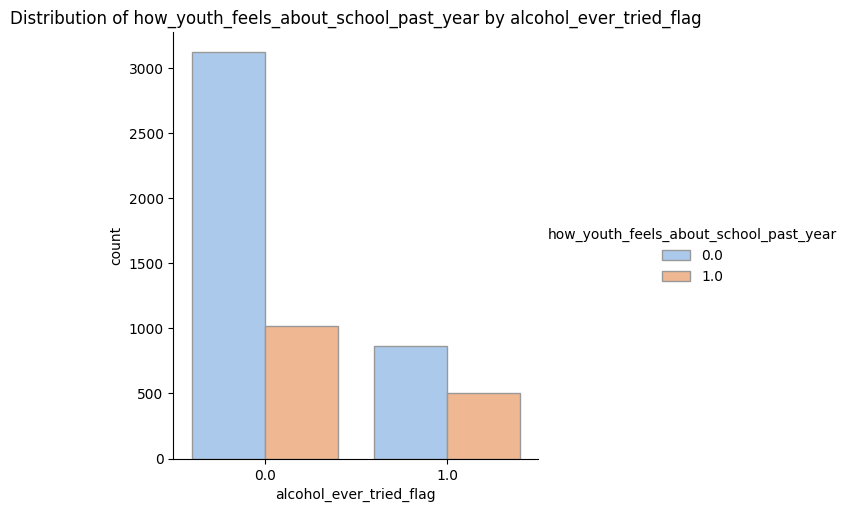

Number of unique values in 'teacher_praised_youth_past_year': 2
Count of each value in 'teacher_praised_youth_past_year':
teacher_praised_youth_past_year
0.0    4091
1.0    1409
Name: count, dtype: int64


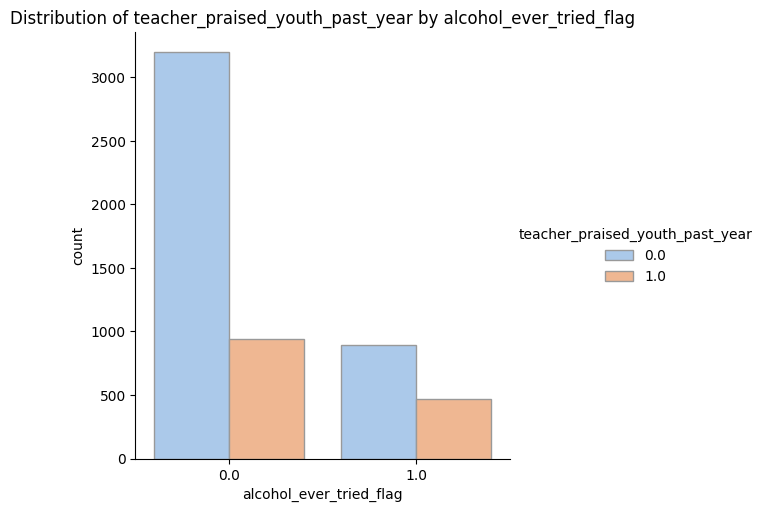

Number of unique values in 'talked_about_dangers_of_substance_use_with_parent': 2
Count of each value in 'talked_about_dangers_of_substance_use_with_parent':
talked_about_dangers_of_substance_use_with_parent
0.0    3388
1.0    2112
Name: count, dtype: int64


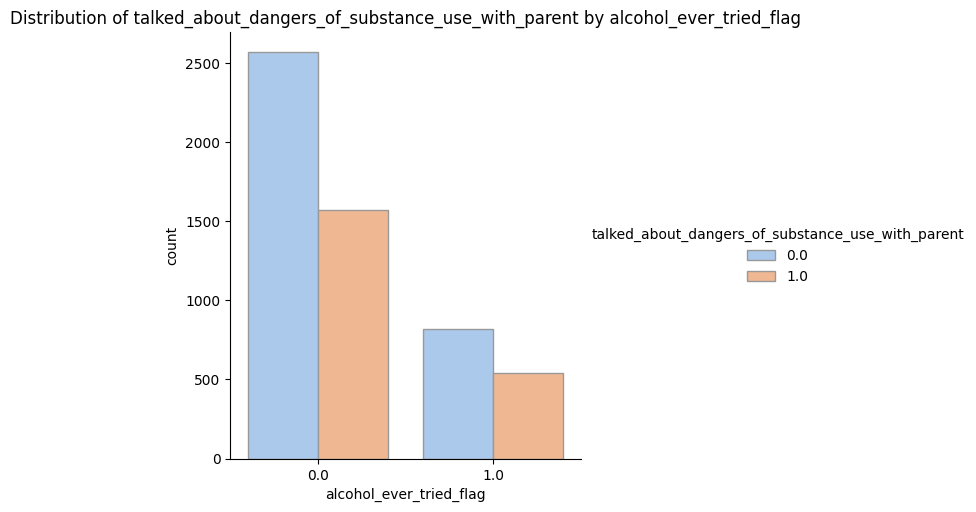

Number of unique values in 'participated_skill_development_group_program': 2
Count of each value in 'participated_skill_development_group_program':
participated_skill_development_group_program
1.0    3881
0.0    1619
Name: count, dtype: int64


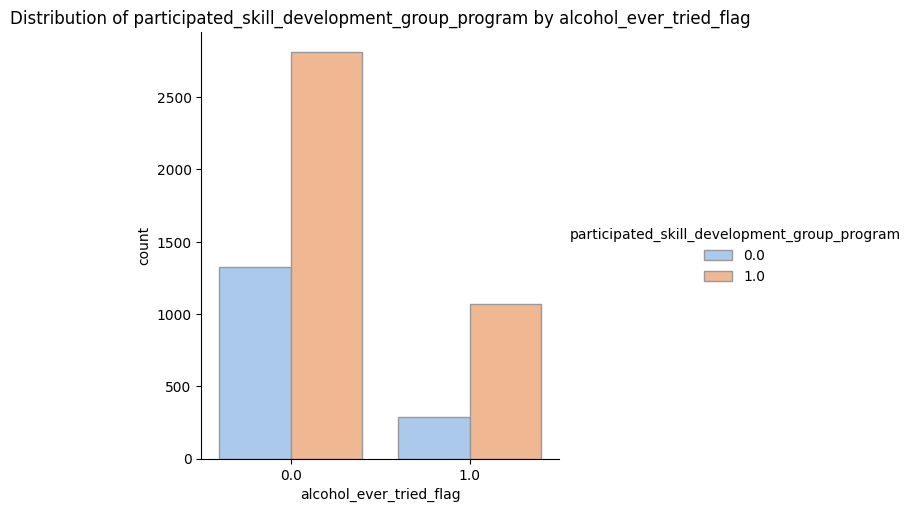

Number of unique values in 'no_of_times_attended_religious_services_past_year': 2
Count of each value in 'no_of_times_attended_religious_services_past_year':
no_of_times_attended_religious_services_past_year
1.0    3895
0.0    1605
Name: count, dtype: int64


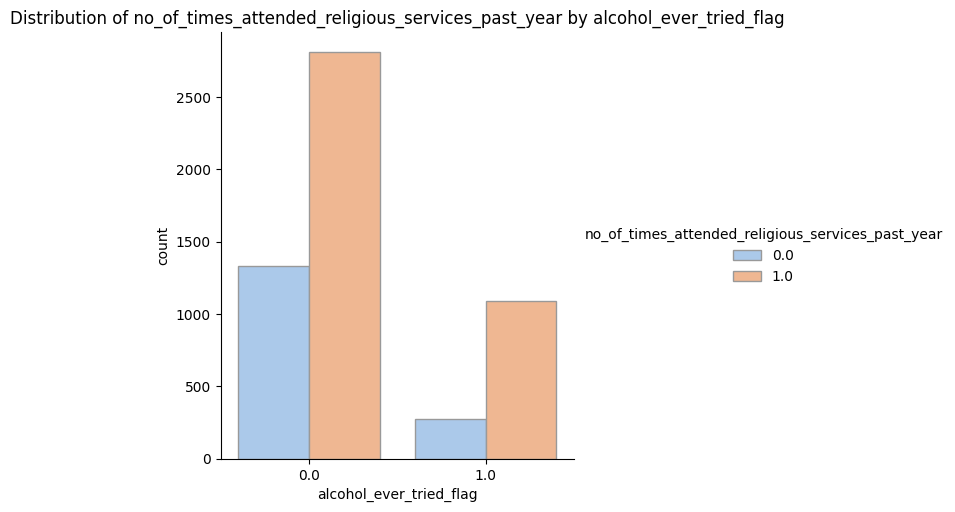

Number of unique values in 'importance_of_religious_beliefs': 2
Count of each value in 'importance_of_religious_beliefs':
importance_of_religious_beliefs
0.0    3583
1.0    1917
Name: count, dtype: int64


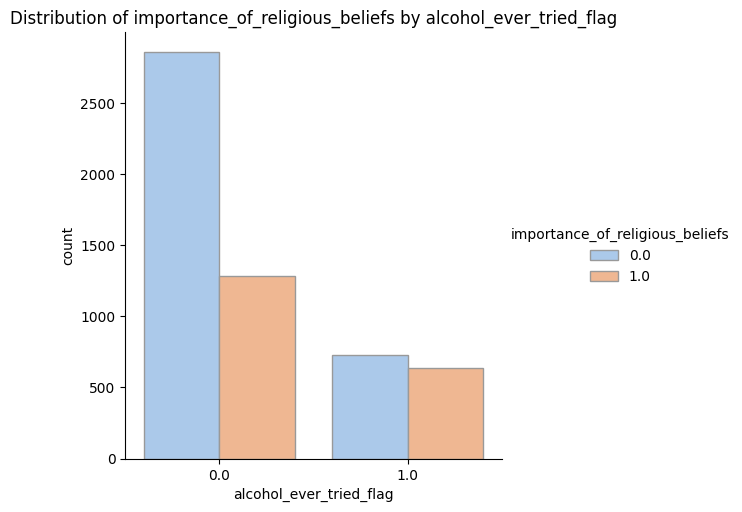

Number of unique values in 'impact_of_religious_beliefs_on_life_decisions': 2
Count of each value in 'impact_of_religious_beliefs_on_life_decisions':
impact_of_religious_beliefs_on_life_decisions
0.0    3176
1.0    2324
Name: count, dtype: int64


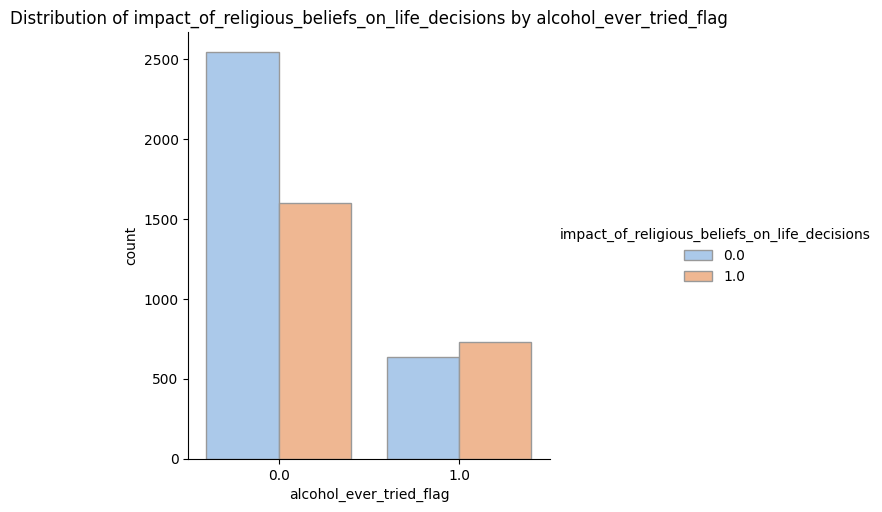

Number of unique values in 'importance_of_friends_sharing_religious_beliefs': 2
Count of each value in 'importance_of_friends_sharing_religious_beliefs':
importance_of_friends_sharing_religious_beliefs
1.0    4022
0.0    1478
Name: count, dtype: int64


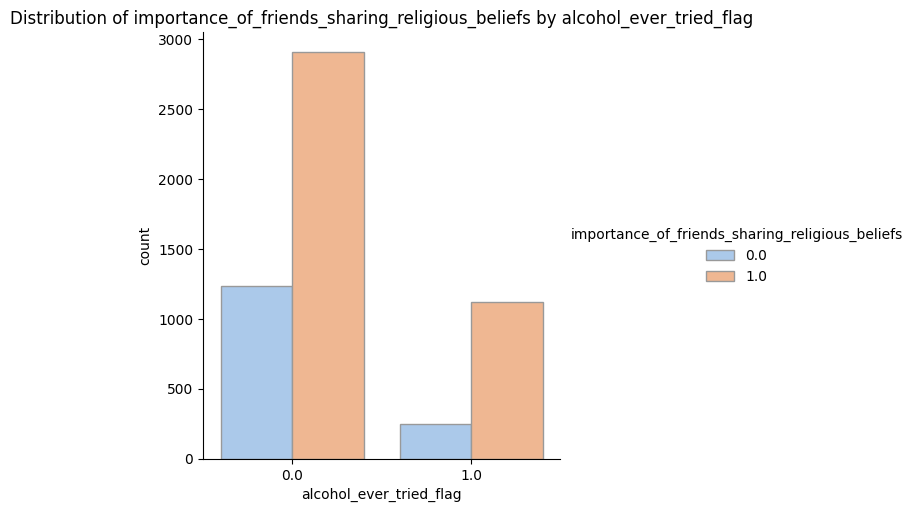

Number of unique values in 'parents_praises_youth_past_year': 2
Count of each value in 'parents_praises_youth_past_year':
parents_praises_youth_past_year
0.0    4737
1.0     763
Name: count, dtype: int64


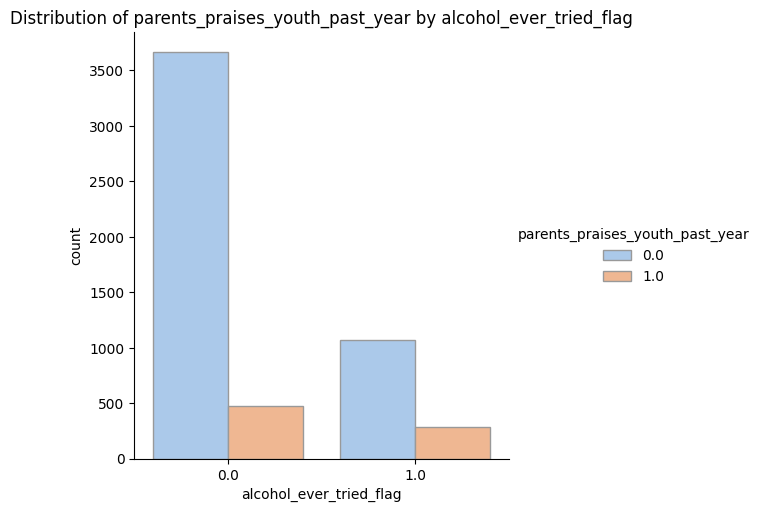

Number of unique values in 'youth_serious_fight_school_work': 2
Count of each value in 'youth_serious_fight_school_work':
youth_serious_fight_school_work
1.0    4718
0.0     782
Name: count, dtype: int64


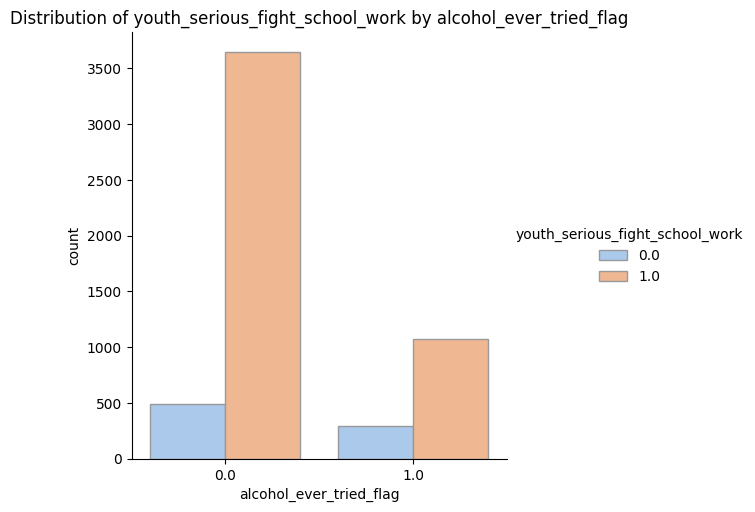

Number of unique values in 'argued_or_fought_with_parents_past_year': 2
Count of each value in 'argued_or_fought_with_parents_past_year':
argued_or_fought_with_parents_past_year
0.0    4391
1.0    1109
Name: count, dtype: int64


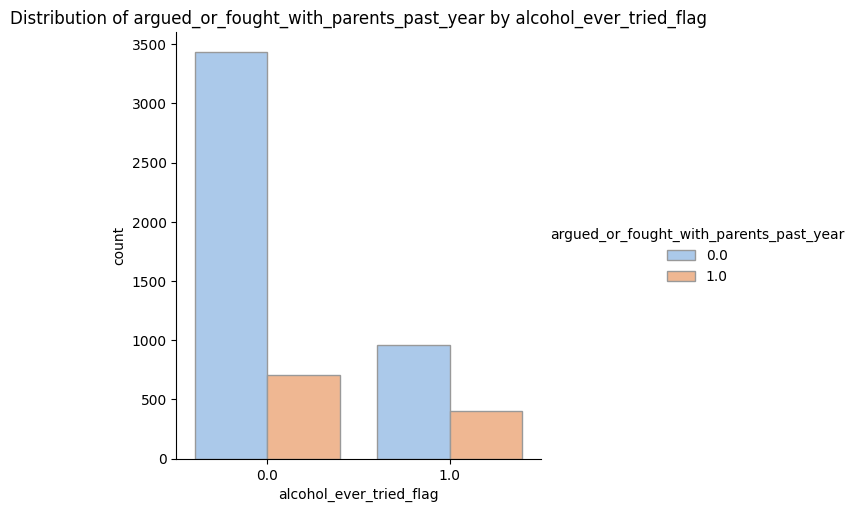

Number of unique values in 'parents_show_pride_past_year': 2
Count of each value in 'parents_show_pride_past_year':
parents_show_pride_past_year
0.0    4634
1.0     866
Name: count, dtype: int64


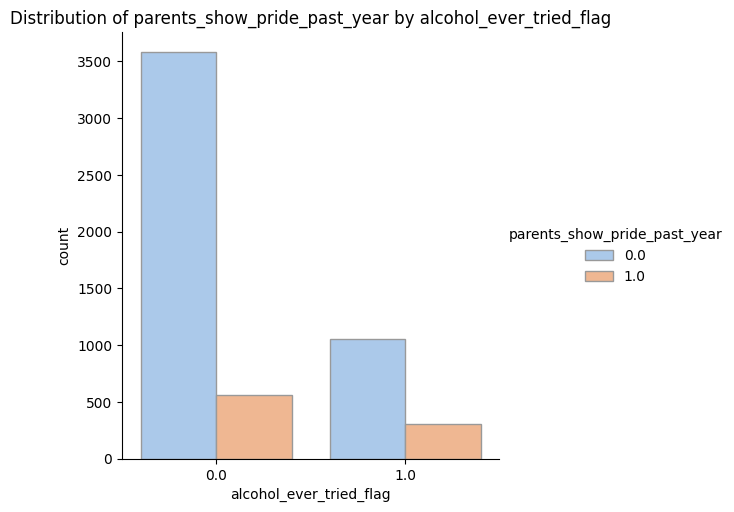

Number of unique values in 'parents_monitors_homework_past_year': 2
Count of each value in 'parents_monitors_homework_past_year':
parents_monitors_homework_past_year
0.0    4558
1.0     942
Name: count, dtype: int64


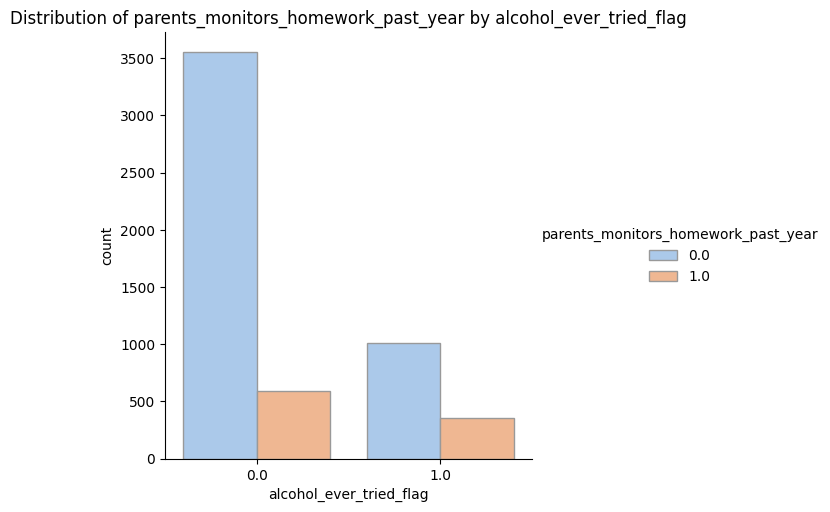

In [993]:
# @title changing the values to 0 or 1 where it has two classes 1 or 2

# find_unique_count_and_plot(df_bc, 'how_youth_feels_about_school_past_year','alcohol_ever_tried_flag')
# find_unique_count_and_plot(df_bc, 'teacher_praised_youth_past_year','alcohol_ever_tried_flag')
# find_unique_count_and_plot(df_bc, 'talked_about_dangers_of_substance_use_with_parent','alcohol_ever_tried_flag')

col_list = ['how_youth_feels_about_school_past_year', 'teacher_praised_youth_past_year',
            'talked_about_dangers_of_substance_use_with_parent', 'participated_skill_development_group_program',
            'no_of_times_attended_religious_services_past_year', 'importance_of_religious_beliefs',
            'impact_of_religious_beliefs_on_life_decisions', 'importance_of_friends_sharing_religious_beliefs',
            'parents_praises_youth_past_year', 'youth_serious_fight_school_work',
            'argued_or_fought_with_parents_past_year', 'parents_show_pride_past_year',
            'parents_monitors_homework_past_year']

# making the values 0 or 1 instead of 1 or 2
for col in col_list:
  df_bc[col].replace({2: 1, 1: 0}, inplace=True)

# plots after updating the columns classes to 0 and 1
for col in col_list:
  find_unique_count_and_plot(df_bc, col,'alcohol_ever_tried_flag')

Number of unique values in 'no_of_days_missed_school_from_skipping': 27
Count of each value in 'no_of_days_missed_school_from_skipping':
no_of_days_missed_school_from_skipping
0.0     3589
99.0     969
1.0      336
2.0      161
98.0     151
3.0       85
4.0       53
5.0       37
94.0      16
7.0       14
10.0      14
8.0       11
6.0       10
15.0       9
9.0        8
97.0       7
30.0       6
18.0       5
12.0       4
20.0       3
14.0       2
13.0       2
16.0       2
22.0       2
25.0       2
11.0       1
23.0       1
Name: count, dtype: int64


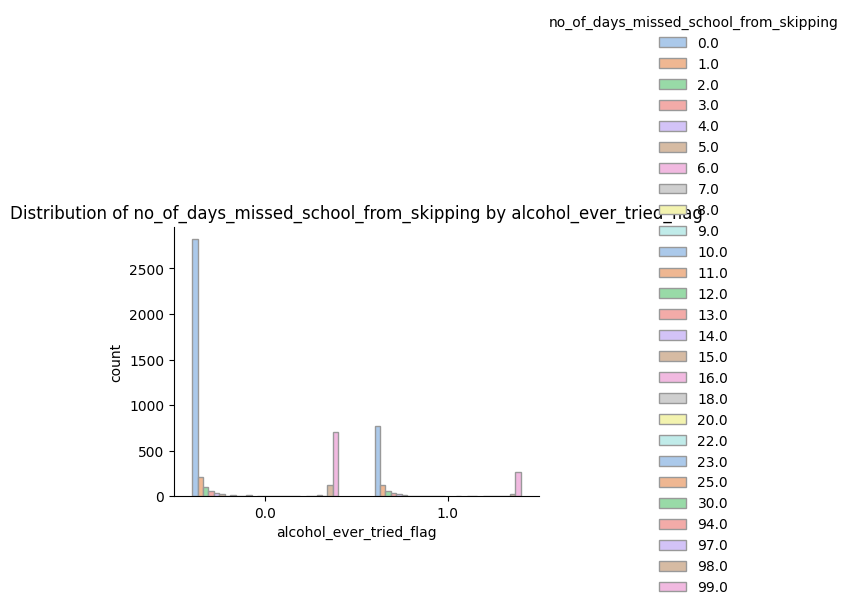

In [994]:
# @title this column no_of_days_missed_school_from_skipping has a lot of categories.
find_unique_count_and_plot(df_bc, 'no_of_days_missed_school_from_skipping','alcohol_ever_tried_flag')

'no_of_days_missed_school_from_skipping' has a lot of categories, so I've planned  to make this column simpler by having:
- one column that's 0 if no response and 1 if responded
- one column that is categorical based on the number of days missed. (low, medium, high) basically a variable indicating the level of absenteeism

Number of unique values in 'missed_school': 2
Count of each value in 'missed_school':
missed_school
0    3589
1    1911
Name: count, dtype: int64


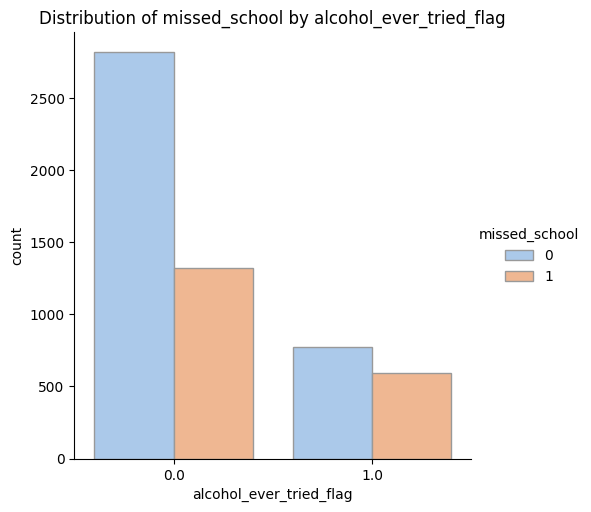

Number of unique values in 'absenteeism_level': 3
Count of each value in 'absenteeism_level':
absenteeism_level
0    3589
2    1239
1     672
Name: count, dtype: int64


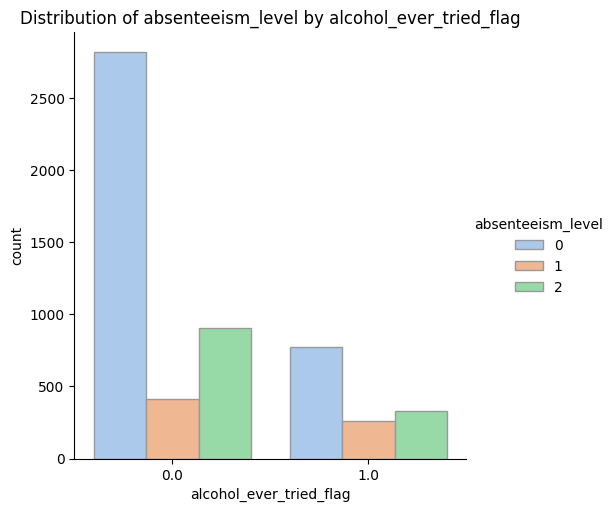

In [995]:
# @title creating two columns for col: no_of_days_missed_school_from_skipping
df_bc['missed_school'] = np.where(df_bc['no_of_days_missed_school_from_skipping'] > 0, 1, 0)

# Creating categorical variable indicating level of absenteeism
def categorize_absenteeism(days_missed):
    if days_missed == 0:
        return 0
    elif days_missed <= 5:
        return 1
    else:
        return 2

df_bc['absenteeism_level'] = df_bc['no_of_days_missed_school_from_skipping'].apply(categorize_absenteeism)

# Dropping the original column
df_bc.drop(columns=['no_of_days_missed_school_from_skipping'], inplace=True)
find_unique_count_and_plot(df_bc, 'missed_school','alcohol_ever_tried_flag')
find_unique_count_and_plot(df_bc, 'absenteeism_level','alcohol_ever_tried_flag')

In [996]:
# @title converting all variables to binary variables and performing one-hot-encoding
convert_to_category(df_bc,df_bc.columns[:-1])

df_bc['absenteeism_level'] = df_bc['absenteeism_level'].astype('category')

for col in df_bc.columns:
  if col != 'alcohol_ever_tried_flag':
      df_bc = one_hot_encoding(df_bc,col)
# df_bc.info()
df_bc.columns[:-1]

Index(['alcohol_ever_tried_flag', 'how_youth_feels_about_school_past_year_0.0',
       'how_youth_feels_about_school_past_year_1.0',
       'teacher_praised_youth_past_year_0.0',
       'teacher_praised_youth_past_year_1.0', 'youth_education_flag_0.0',
       'youth_education_flag_1.0',
       'talked_about_dangers_of_substance_use_with_parent_0.0',
       'talked_about_dangers_of_substance_use_with_parent_1.0',
       'participated_skill_development_group_program_0.0',
       'participated_skill_development_group_program_1.0',
       'no_of_times_attended_religious_services_past_year_0.0',
       'no_of_times_attended_religious_services_past_year_1.0',
       'importance_of_religious_beliefs_0.0',
       'importance_of_religious_beliefs_1.0',
       'impact_of_religious_beliefs_on_life_decisions_0.0',
       'impact_of_religious_beliefs_on_life_decisions_1.0',
       'importance_of_friends_sharing_religious_beliefs_0.0',
       'importance_of_friends_sharing_religious_beliefs_1.0',
  

Target variable class distribution:
alcohol_ever_tried_flag
0.0    0.752364
1.0    0.247636
Name: proportion, dtype: float64


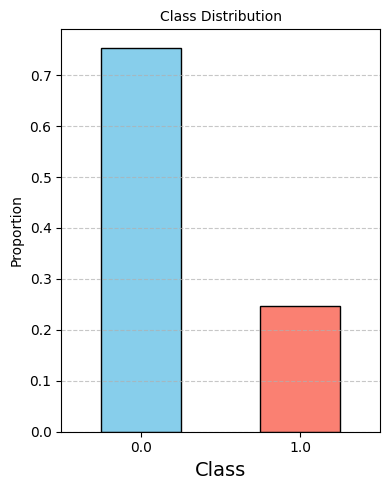

In [997]:
# @title Decision tree - using stratify sampling because we have imbalance in the dataset between class 0 and class 1

X = df_bc.drop(columns=['alcohol_ever_tried_flag'])  # predictors
y = df_bc['alcohol_ever_tried_flag']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

# Initializing the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

class_distribution = pd.Series(y).value_counts(normalize=True)
print("Target variable class distribution:")
print(class_distribution)

plt.figure(figsize=(4, 5))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Class Distribution', fontsize=10)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Proportion', fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [998]:
# @title Decision tree performance on training data

#Training the classifier
dt_classifier.fit(X_train, y_train)

# Predictions on the training set
y_pred_train = dt_classifier.predict(X_train)

# Accuracy on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set:",  round(accuracy_train,4)*100)

# Confusion matrix on the training set
print("Confusion Matrix on training set:")
# print(confusion_matrix(y_train, y_pred_train))
confusion_matrix = pd.crosstab(index=y_pred_train, columns=y_train, rownames=[''])
confusion_matrix

Accuracy on training set: 87.58
Confusion Matrix on training set:


alcohol_ever_tried_flag   0.0  1.0
                                  
0.0                      2864  445
1.0                        33  508

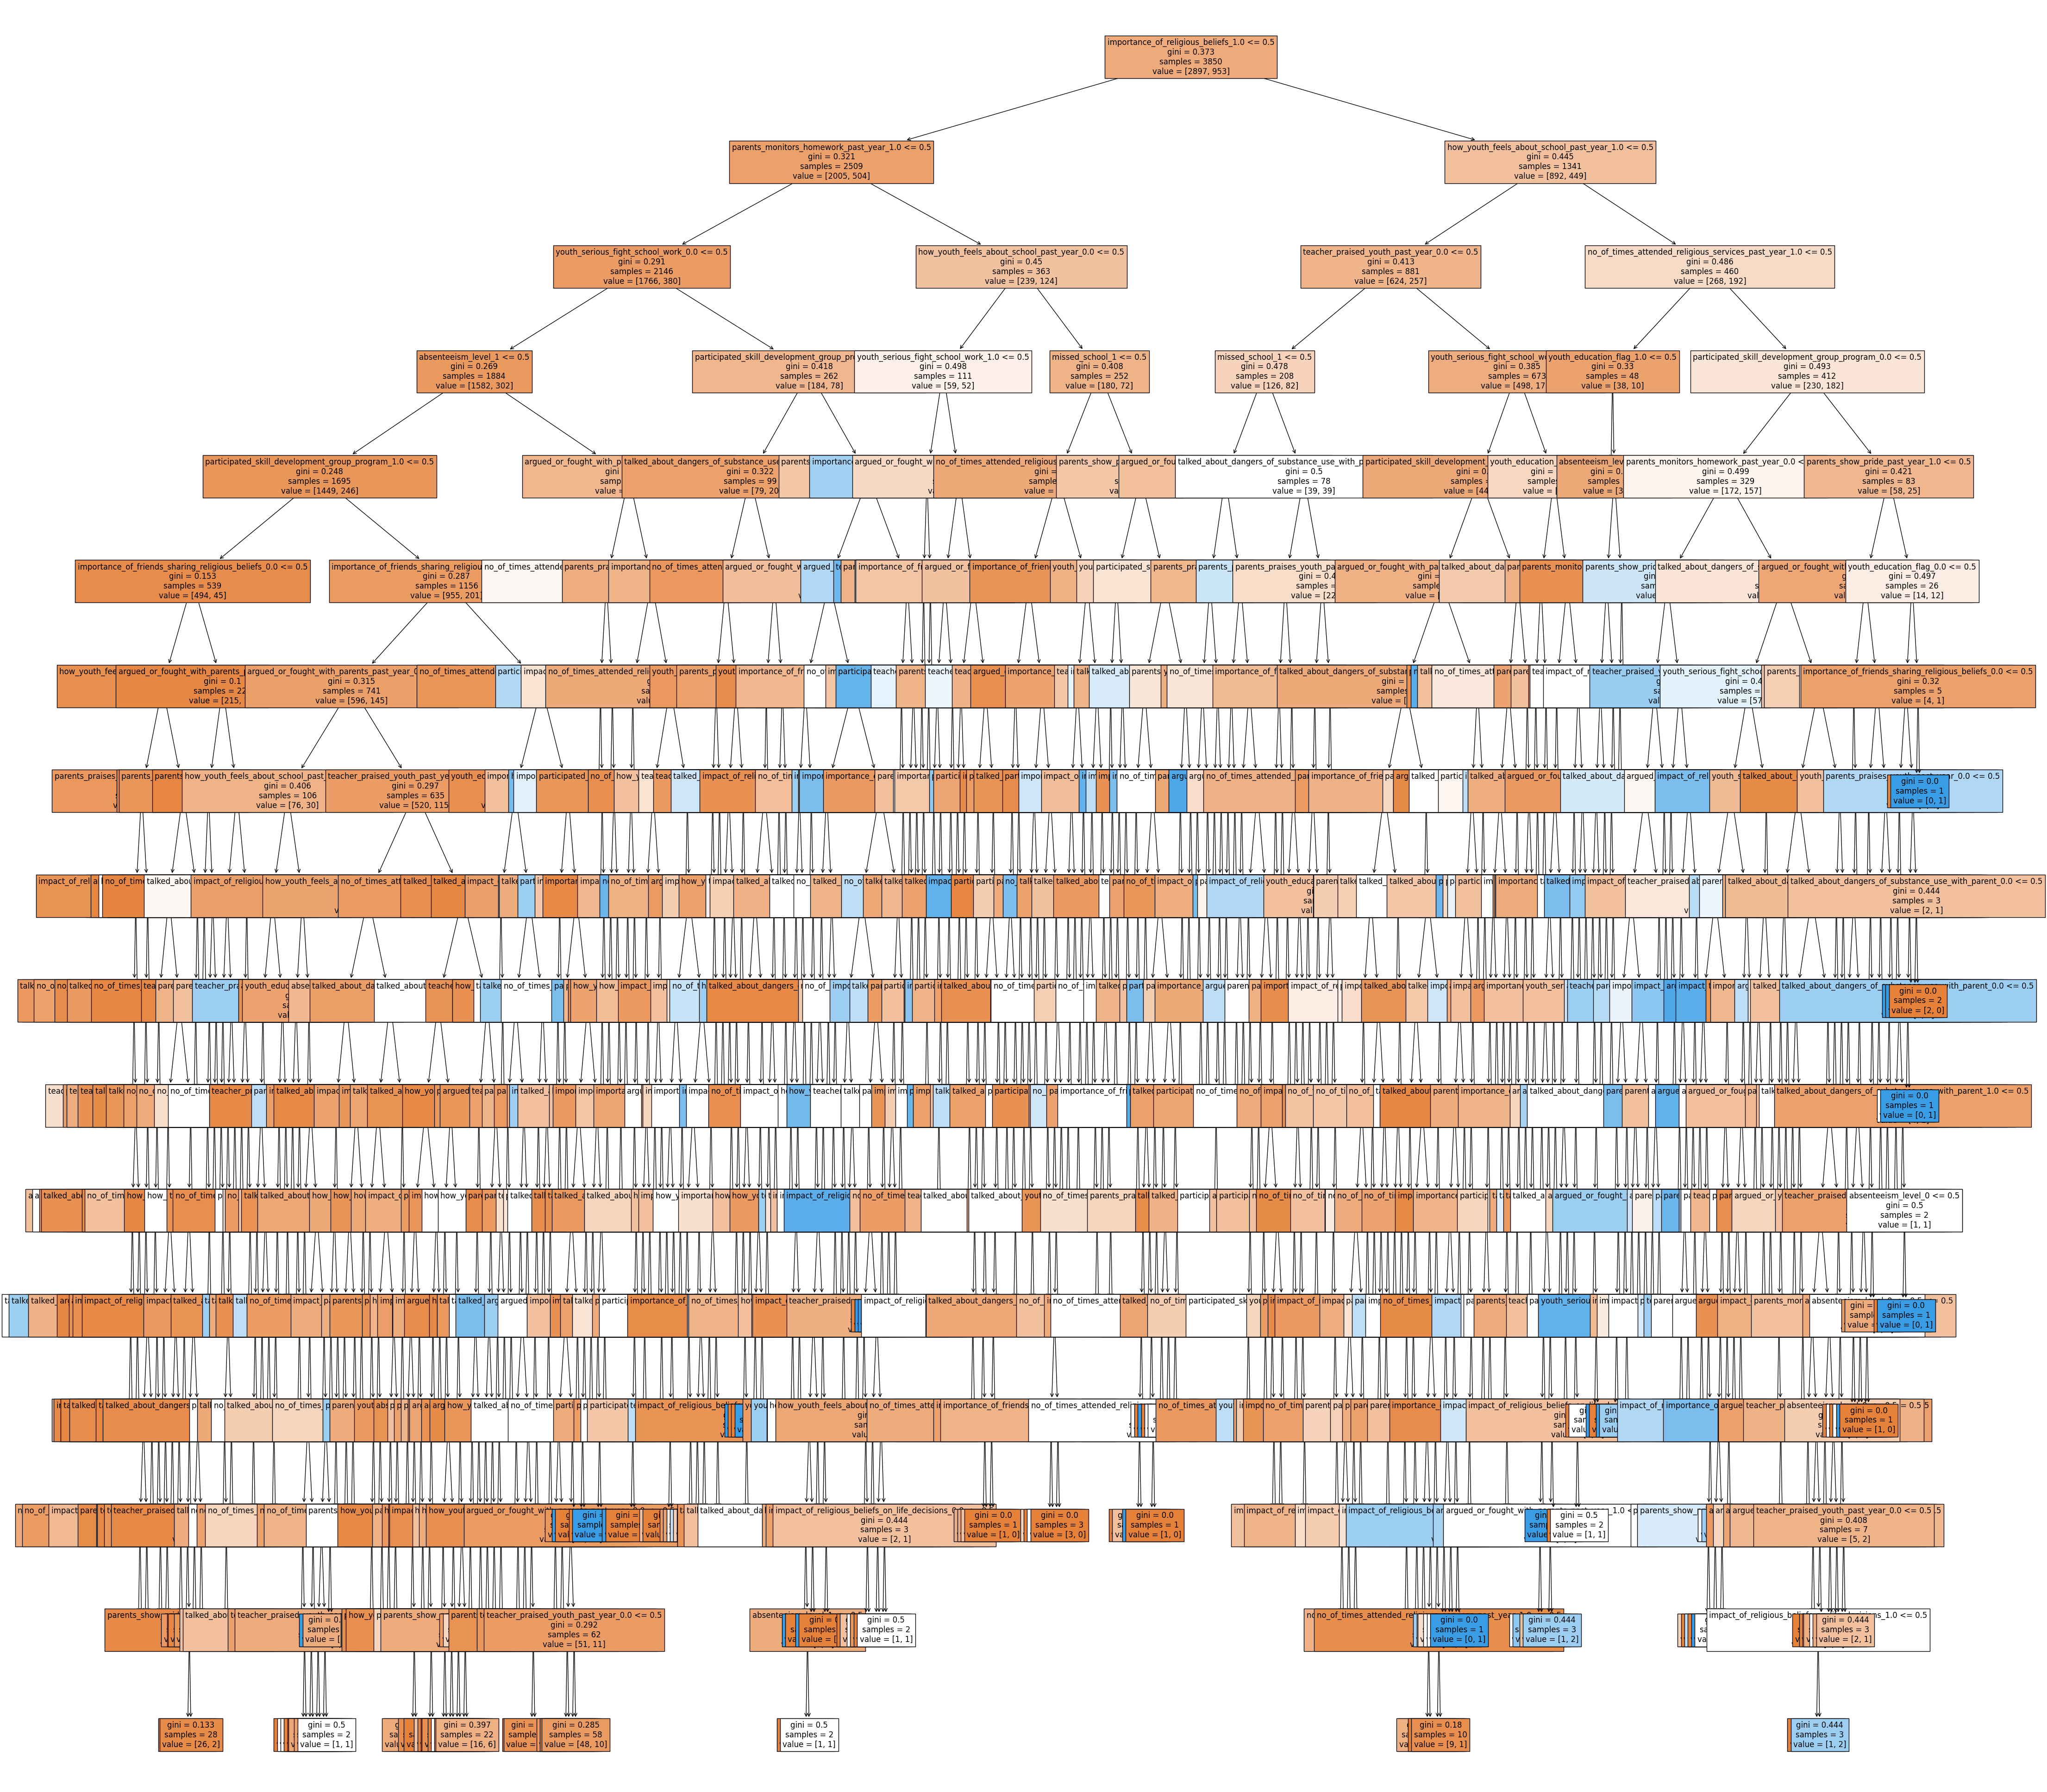

In [999]:
# @title visualizing the tree
plt.figure(figsize=(50,50))
plot_tree(dt_classifier
          , filled=True
          , feature_names=X.columns
          #, class_names=[0, 1]
          , label='all'
          , fontsize=12)
plt.show()

In [1000]:
# @title let's se how it performs on the test data

#Predictions on the testing set
y_pred = dt_classifier.predict(X_test)

#evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)

confusion_matrix = pd.crosstab(index=y_pred, columns=y_test, rownames=[''])

print("Accuracy:",  round(accuracy,4)*100)
print(confusion_matrix)
# print("Classification Report:")
# report = classification_report(y_test, y_pred)
# print(report)

Accuracy: 71.82
alcohol_ever_tried_flag   0.0  1.0
                                  
0.0                      1088  312
1.0                       153   97


The model is good at correctly predicting class 0 but not good at predicting class 1.

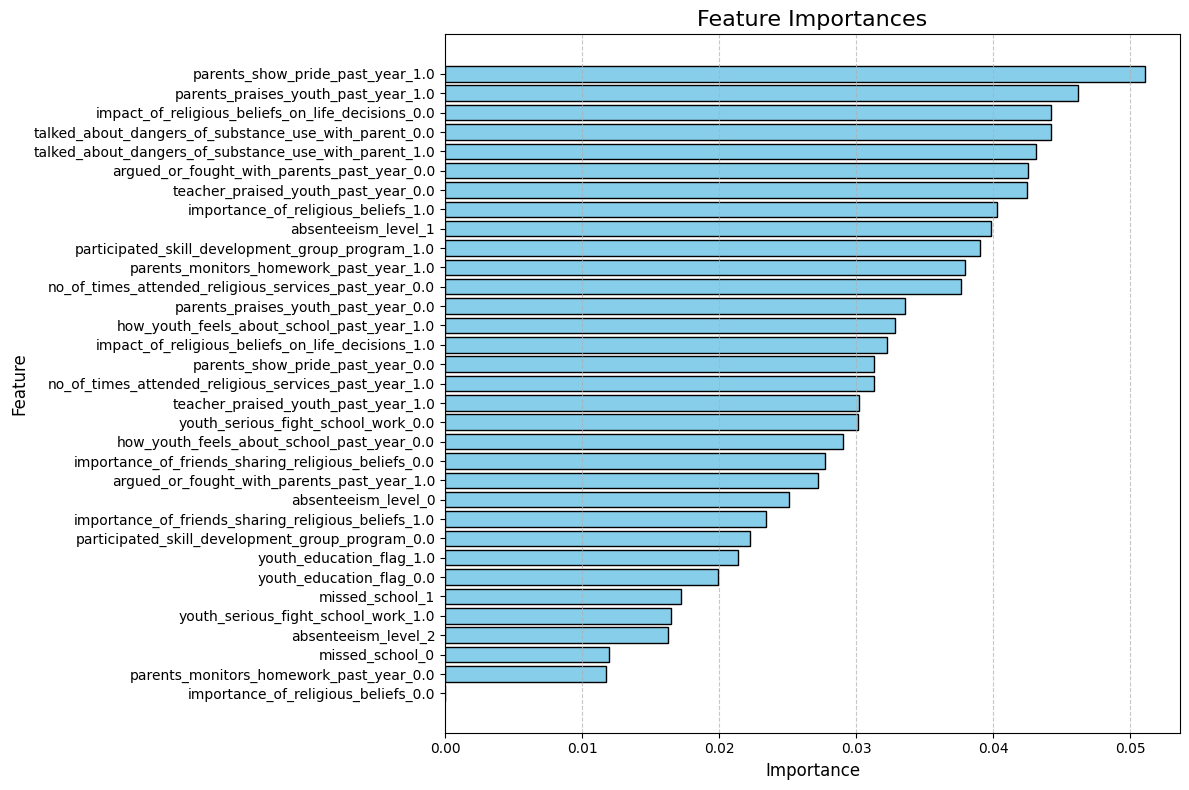

In [1001]:
# @title Let's analyse important features

feature_importances = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# top_10_features = feature_importance_df.head(10)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importances', fontsize=16)
 # Inverting y-axis to show most important features at the top
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The plot confirms our assumptions that predictors related to family, religious beliefs and school is essential in predicting substance use.

Let's try other models

In [1002]:
# @title random forest
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", round(accuracy_rf,4)*100)

# # Classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix:")
confusion_matrix = pd.crosstab(index=y_pred, columns=y_test, rownames=['Predicted'], colnames=['Actual'])

print(confusion_matrix)

Random Forest Classifier Accuracy: 73.09
Confusion Matrix:
Actual      0.0  1.0
Predicted           
0.0        1088  312
1.0         153   97


the Random Forest Classifier performed slightly better in terms of accuracy compared to the unpruned decision tree classifier

In [1003]:
# fit Random Forests model
bag = RandomForestClassifier(max_features=X_train.shape[1],random_state = 42)
bag.fit(X_train,y_train)

print("Number of trees:", bag.n_estimators)
print("Number of features tried at each split:",bag.max_features)
print("Training score: {:.2f}%".format(bag.score(X_train,y_train)*100))
# Predict values
y_pred = bag.predict(X_test)
print("Test score: {:.2f}%".format(bag.score(X_test,y_test)*100))
confusion_matrix = pd.crosstab(index=y_pred, columns=y_test, rownames=[''])
print(confusion_matrix)

Number of trees: 100
Number of features tried at each split: 33
Training score: 87.58%
Test score: 72.67%
alcohol_ever_tried_flag   0.0  1.0
                                  
0.0                      1107  317
1.0                       134   92


Bagging is slightly better at predicting class 1 compared to unpruned decision tree and random forest.

let's limit the depth of the tree and see how it looks

let's limit the max depth


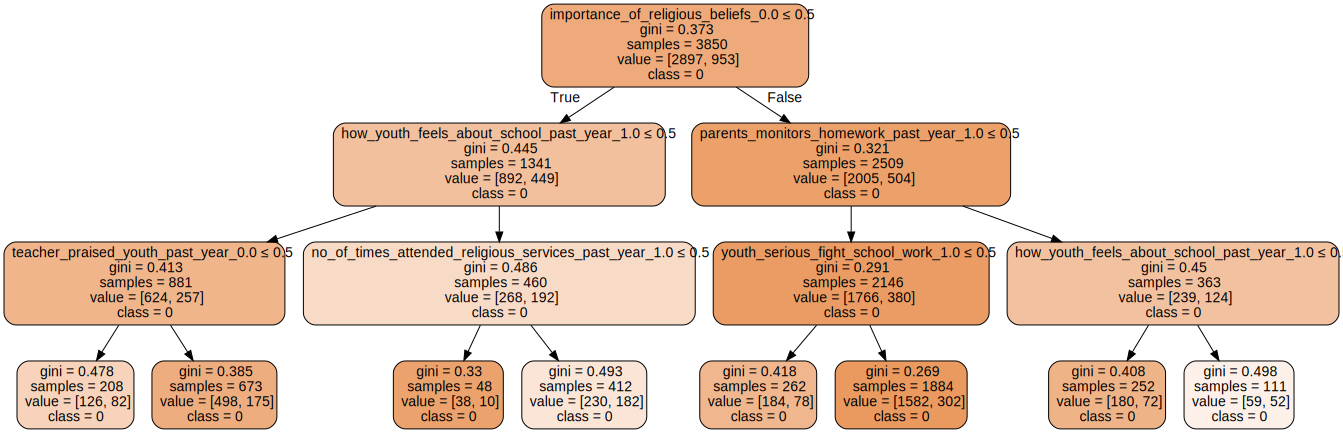

In [1004]:
from sklearn.tree import export_graphviz
import graphviz

# Limiting the depth of the tree
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train, y_train)

dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X_train.columns, class_names=["0", "1"],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph


**Root Node:**

The root of the tree is the question about the importance_of_religious_beliefs_0.
The gini value here is 0.373. There are 3,850 samples at this node, and it is predominantly of class 0 (2,897 samples of class 0 vs. 953 of class 1).

**Left Subtree (True Branch)**:

If the importance of religious beliefs is low, the tree further asks if parents_monitors_homework_past_year_0 is 0 or below 0.5.

If yes, it then considers youth_serious_fight_school_work_0.

This branch seems to be quite significant in size, with many samples and further splits, indicating that monitoring homework and fights over school work are important factors for classification when religious beliefs are of lesser importance.

**Right Subtree (False Branch)**:

If the importance of religious beliefs is high, the tree looks at how the youth feels about school and attendance at religious services in the past year.
This side of the tree suggests that when religious beliefs are considered more important, feelings about school and religious service attendance play a role in the classification.


In [1005]:
#Predictions on the testing set
y_pred = dt_classifier.predict(X_test)

#evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)

confusion_matrix = pd.crosstab(index=y_pred, columns=y_test, rownames=[''])

print("Accuracy:",  round(accuracy,4)*100)
print(confusion_matrix)

Accuracy: 75.21
alcohol_ever_tried_flag   0.0  1.0
                                  
0.0                      1241  409


Limiting max depth to 3 had a significant improvement with 75% accuracy and this tree is actually better at classifying the class 1. I reduced the tree size manually by reducing the depth, but let's find this value using cross-validation.


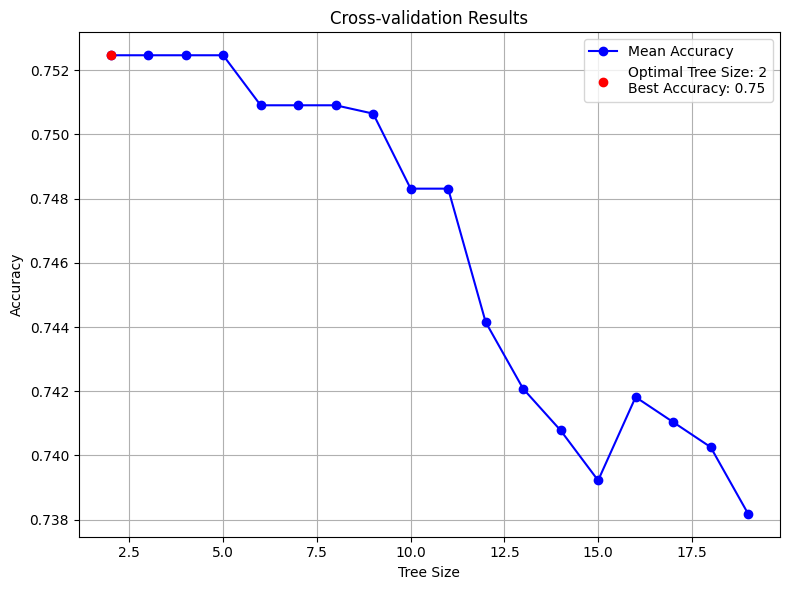

Optimal Tree Size: 2
Best Accuracy: 0.7524675324675325


In [1006]:

# Define the decision tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters to search over
params = {'max_leaf_nodes': range(2, 20)}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=params, cv=10)
grid_search.fit(X_train, y_train)

# Get the results of cross-validation
cv_results = grid_search.cv_results_

# Find the best tree size
best_size = grid_search.best_params_['max_leaf_nodes']
best_score = grid_search.best_score_

# Plot the cross-validation results with enhanced style
plt.figure(figsize=(8, 6))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-', color='b', label='Mean Accuracy')
plt.plot(best_size, best_score, 'ro', label=f'Optimal Tree Size: {best_size}\nBest Accuracy: {best_score:.2f}')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Optimal Tree Size:", best_size)
print("Best Accuracy:", best_score)

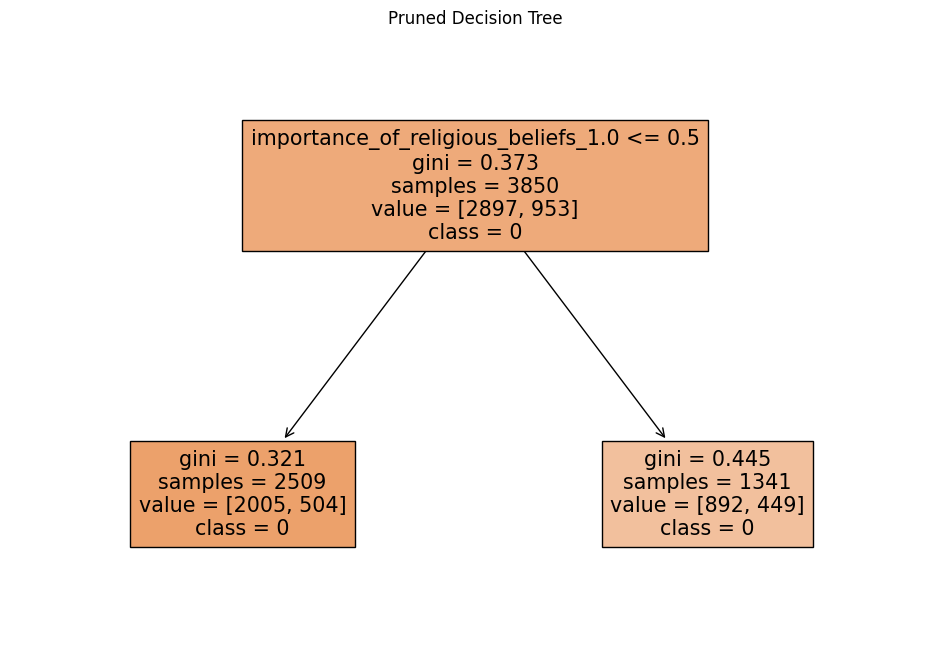

In [1007]:
# @title Creating pruned tree using the optimal size
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create the pruned decision tree classifier
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=42)
pruned_tree.fit(X_train, y_train)

# Plot the pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
plt.title('Pruned Decision Tree')
plt.show()


In [1008]:
# Predictions on the test set
y_pred_pruned = pruned_tree.predict(X_test)

# Confusion matrix
conf_matrix_pruned = pd.crosstab(index=y_pred_pruned, columns=y_test,  rownames=['Predicted'], colnames=['Actual'])
print("Confusion Matrix for Pruned Decision Tree:")
print(conf_matrix_pruned)
#Calculate the accuracy of the decision tree on the test data
accuracy = pruned_tree.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Confusion Matrix for Pruned Decision Tree:
Actual      0.0  1.0
Predicted           
0.0        1241  409
Accuracy: 75.21%


In [1009]:
# @title gradient boosting
gb_classifier = GradientBoostingClassifier(random_state=42,n_estimators=3500, max_depth=4)

# Training the classifier
gb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Accuracy on the test set
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", round(accuracy_gb * 100, 2))

# Confusion matrix
conf_matrix_gb = pd.crosstab(index=y_pred_gb, columns=y_test,  rownames=['Predicted'], colnames=['Actual'])
print("Confusion Matrix:")
print(conf_matrix_gb)

Gradient Boosting Classifier Accuracy: 71.39
Confusion Matrix:
Actual      0.0  1.0
Predicted           
0.0        1082  313
1.0         159   96


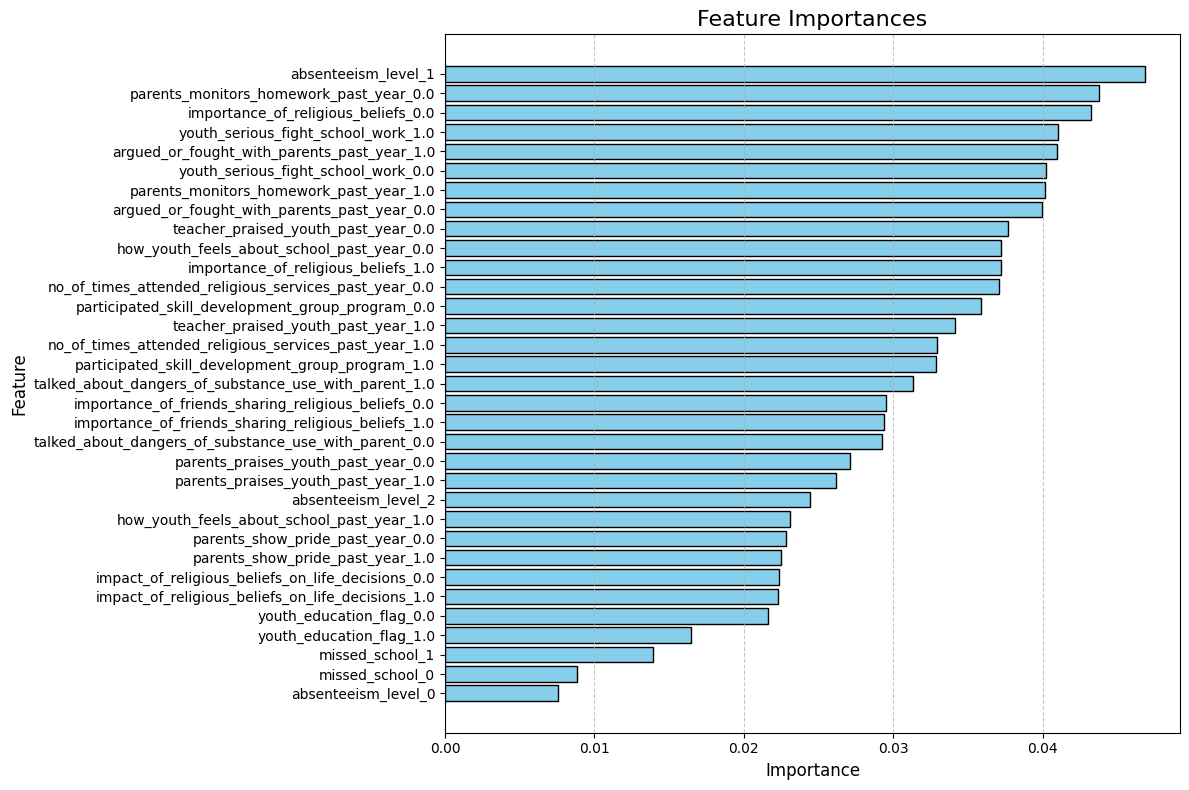

In [1010]:
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importances', fontsize=16)
 # Inverting y-axis to show most important features at the top
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

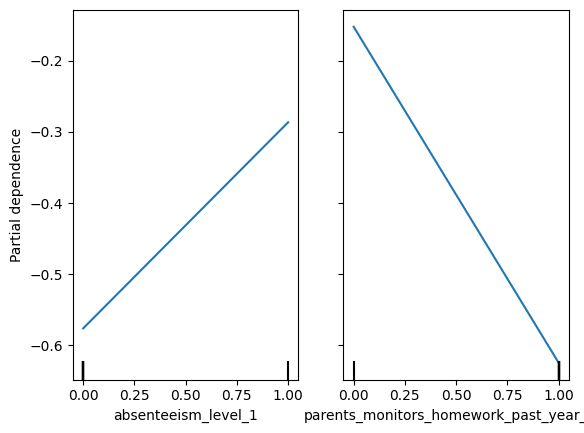

In [1011]:
PartialDependenceDisplay.from_estimator(gb_classifier, X_train, ['absenteeism_level_1', 'parents_monitors_homework_past_year_0.0']);

- The upward slope of the line indicates a positive relationship between absenteeism level and the response variable. As absenteeism_level_1 increases, the response variable also increases.
- The partial_dependence on the y-axis here shows a negative relationship. As the monitoring by parents increases, the expected value of the target variable decreases.

In [1012]:
# # @title Multiclass classification - merging the columns: alcohol_ever_tried_flag, tobacco_ever_tried_flag and marijuana_ever_tried_flag

# Create a dictionary to map the values
mapping = {1: 1, 2: 2, 3: 3}

# Creating a list of the columns to use
columns = ['alcohol_ever_tried_flag', 'marijuana_ever_tried_flag', 'tobacco_ever_tried_flag']

# Create a new column using numpy.select
df_imputed['substance_use_flag'] = np.select(
    condlist=[df_imputed[col] == 1 for col in columns],
    choicelist=[mapping[i] for i in range(1, len(columns) + 1)],
    default=0
)

df_imputed['substance_use_flag'] .value_counts()

substance_use_flag
0    3902
1    1362
2     142
3      94
Name: count, dtype: int64

I'll be using df_bc that was used for binary classification. Because I plan to use most of those variables for the multi_class_classification too.

In [1013]:
df_mc = df_bc.drop(columns=['alcohol_ever_tried_flag']).copy()

df_mc['substance_use_flag'] = df_imputed['substance_use_flag']
df_mc.columns

Index(['how_youth_feels_about_school_past_year_0.0',
       'how_youth_feels_about_school_past_year_1.0',
       'teacher_praised_youth_past_year_0.0',
       'teacher_praised_youth_past_year_1.0', 'youth_education_flag_0.0',
       'youth_education_flag_1.0',
       'talked_about_dangers_of_substance_use_with_parent_0.0',
       'talked_about_dangers_of_substance_use_with_parent_1.0',
       'participated_skill_development_group_program_0.0',
       'participated_skill_development_group_program_1.0',
       'no_of_times_attended_religious_services_past_year_0.0',
       'no_of_times_attended_religious_services_past_year_1.0',
       'importance_of_religious_beliefs_0.0',
       'importance_of_religious_beliefs_1.0',
       'impact_of_religious_beliefs_on_life_decisions_0.0',
       'impact_of_religious_beliefs_on_life_decisions_1.0',
       'importance_of_friends_sharing_religious_beliefs_0.0',
       'importance_of_friends_sharing_religious_beliefs_1.0',
       'parents_praises_youth

In [1014]:
df_mc.head()

how_youth_feels_about_school_past_year_0.0  \
0                                        True   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   how_youth_feels_about_school_past_year_1.0  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   teacher_praised_youth_past_year_0.0  teacher_praised_youth_past_year_1.0  \
0                                 True                                False   
1                                 True                                False   
2                                 True                                False   
3                                 True                                False   
4                                 True                                False   

   youth_education_flag_0.0  youth_education_flag_1.0  \
0                     False                      True   
1                     False                      True   
2                     False                      True   
3                     False                      True   
4                     False                      True   

   talked_about_dangers_of_substance_use_with_parent_0.0  \
0                                              False       
1                                               True       
2                                              False       
3                                               True       
4                                               True       

   talked_about_dangers_of_substance_use_with_parent_1.0  \
0                                               True       
1                                              False       
2                                               True       
3                                              False       
4                                              False       

   participated_skill_development_group_program_0.0  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   participated_skill_development_group_program_1.0  ...  \
0                                              True  ...   
1                                              True  ...   
2                                              True  ...   
3                                              True  ...   
4                                              True  ...   

   parents_show_pride_past_year_0.0  parents_show_pride_past_year_1.0  \
0                             False                              True   
1                              True                             False   
2                              True                             False   
3                              True                             False   
4                              True                             False   

   parents_monitors_homework_past_year_0.0  \
0                                     True   
1                                     True   
2                                     True   
3                                     True   
4                                     True   

   parents_monitors_homework_past_year_1.0  missed_school_0  missed_school_1  \
0                                    False             True            False   
1                                    False             True            False   
2                                    False             True            False   
3                                    False             True            False   
4                                    False             True      

Accuracy: 0.666060606060606


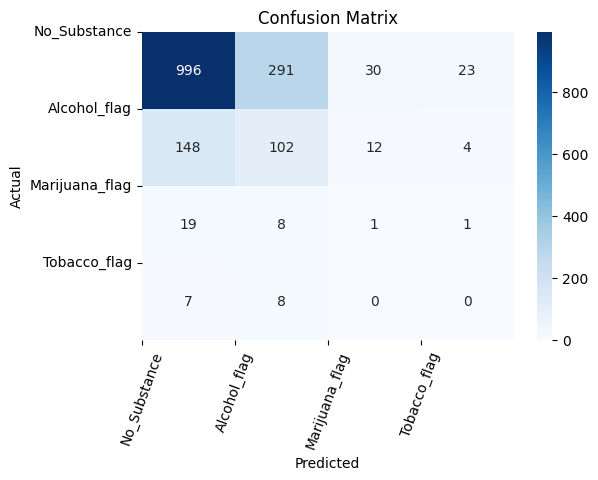

In [1015]:
output = ['No_Substance','Alcohol_flag','Marijuana_flag','Tobacco_flag']

X = df_mc.drop(columns=['substance_use_flag'])
y = df_mc['substance_use_flag']

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Decision Tree classifier
dt_mc_classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier
dt_mc_classifier.fit(X_train, y_train)

# Predictions on the testing set
y_pred = dt_mc_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = pd.crosstab(index=y_pred, columns=y_test, rownames=[''])
# print("Confusion Matrix:")
# print(conf_matrix)
# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=df_mc['substance_use_flag'].unique(),
            yticklabels=df_mc['substance_use_flag'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.yticks(range(4),[out for out in output],rotation = 0)
plt.xticks(range(4),[out for out in output],rotation = 70)
plt.title('Confusion Matrix')
plt.show()

The model is better on class 0 but pretty bad at predicting the output for class 1.


In [1016]:
feature_importances = dt_mc_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# top_10_features = feature_importance_df.head(10)
feature_importance_df

Feature  Importance
0          how_youth_feels_about_school_past_year_0.0    0.048403
14  impact_of_religious_beliefs_on_life_decisions_0.0    0.045289
25                   parents_show_pride_past_year_1.0    0.040276
1          how_youth_feels_about_school_past_year_1.0    0.039923
3                 teacher_praised_youth_past_year_1.0    0.039772
31                                absenteeism_level_1    0.039311
2                 teacher_praised_youth_past_year_0.0    0.038488
13                importance_of_religious_beliefs_1.0    0.038291
6   talked_about_dangers_of_substance_use_with_par...    0.037921
16  importance_of_friends_sharing_religious_belief...    0.036995
11  no_of_times_attended_religious_services_past_y...    0.035812
7   talked_about_dangers_of_substance_use_with_par...    0.035746
15  impact_of_religious_beliefs_on_life_decisions_1.0    0.034016
22        argued_or_fought_with_parents_past_year_0.0    0.033872
19                parents_praises_youth_past_year_1.0    0.032591
20                youth_serious_fight_school_work_0.0    0.031893
9    participated_skill_development_group_program_1.0    0.031755
8    participated_skill_development_group_program_0.0    0.031018
4                            youth_education_flag_0.0    0.030953
18                parents_praises_youth_past_year_0.0    0.030845
23        argued_or_fought_with_parents_past_year_1.0    0.030398
26            parents_monitors_homework_past_year_0.0    0.028178
27            parents_monitors_homework_past_year_1.0    0.028007
17  importance_of_friends_sharing_religious_belief...    0.027750
21                youth_serious_fight_school_work_1.0    0.027707
24                   parents_show_pride_past_year_0.0    0.026541
30                                absenteeism_level_0    0.022948
5                            youth_education_flag_1.0    0.021713
10  no_of_times_attended_religious_services_past_y...    0.021235
32                                absenteeism_level_2    0.019764
29                                    missed_school_1    0.006798
28                                    missed_school_0    0.005788
12                importance_of_religious_beliefs_0.0    0.000000

In [1017]:
# @title Random Forest
# Split the Data between test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42, stratify=y)

# create Random Forest model with class_weight parameter
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

# predict on test data
y_pred = rf_classifier.predict(X_test)

# create confusion matrix
confusion_matrix = pd.crosstab(index=y_pred, columns=y_test, rownames=[''])
print(confusion_matrix)

substance_use_flag     0    1   2   3
                                     
0                   1051  305  28  24
1                    105   97  15   3
2                     12    4   0   1
3                      2    3   0   0


In [1018]:
accuracy = rf_classifier.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 69.58%


Slightly better

In [1019]:
# @title Let's try bagging

bagging_mc = RandomForestClassifier(max_features=X_train.shape[1],random_state = 42)
bagging_mc.fit(X_train,y_train)

print("Number of trees:", bagging_mc.n_estimators)
print("Number of features tried at each split:",bagging_mc.max_features)
print("Training score: {:.2f}%".format(bagging_mc.score(X_train,y_train)*100))

y_pred = bagging_mc.predict(X_test)

confusion_matrix = pd.crosstab(index=y_pred, columns=y_test, rownames=[''])
print(confusion_matrix)

Number of trees: 100
Number of features tried at each split: 33
Training score: 85.12%
substance_use_flag     0    1   2   3
                                     
0                   1044  298  31  24
1                    114  104  12   4
2                      9    4   0   0
3                      3    3   0   0


In [1020]:
accuracy = bagging_mc.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 69.58%


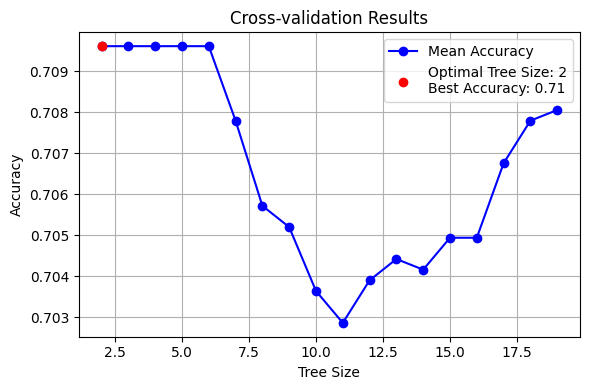

Optimal Tree Size: 2
Best Accuracy: 0.7096103896103896


In [1021]:
# @title Find optimal tree size

tree_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters to search over
params = {'max_leaf_nodes': range(2, 20)}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=params, cv=10)
grid_search.fit(X_train, y_train)

# Get the results of cross-validation
cv_results = grid_search.cv_results_

# Find the best tree size
best_size = grid_search.best_params_['max_leaf_nodes']
best_score = grid_search.best_score_

# Plot the cross-validation results with enhanced style
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-', color='b', label='Mean Accuracy')
plt.plot(best_size, best_score, 'ro', label=f'Optimal Tree Size: {best_size}\nBest Accuracy: {best_score:.2f}')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Optimal Tree Size:", best_size)
print("Best Accuracy:", best_score)

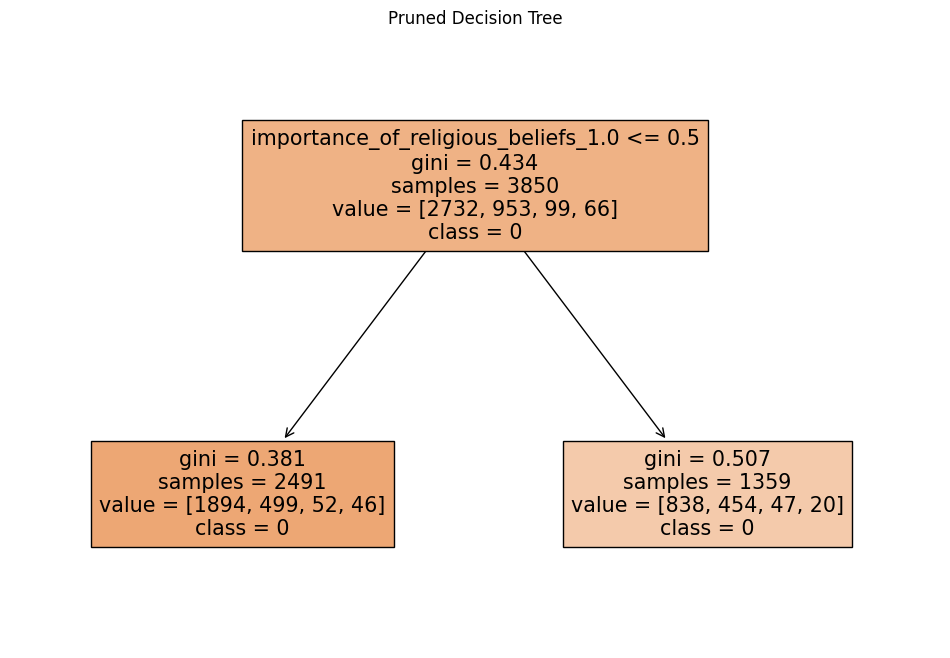

In [1022]:
# @title Creating pruned tree using the optimal size
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create the pruned decision tree classifier
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=best_size, random_state=42)
pruned_tree.fit(X_train, y_train)

# Plot the pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
plt.title('Pruned Decision Tree')
plt.show()

In [1023]:
# Predictions on the test set
y_pred_pruned = pruned_tree.predict(X_test)

# Confusion matrix
conf_matrix_pruned = pd.crosstab(index=y_pred_pruned, columns=y_test,  rownames=['Predicted'], colnames=['Actual'])
print("Confusion Matrix for Pruned Decision Tree:")
print(conf_matrix_pruned)
#Calculate the accuracy of the decision tree on the test data
accuracy = pruned_tree.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Confusion Matrix for Pruned Decision Tree:
Actual        0    1   2   3
Predicted                   
0          1170  409  43  28
Accuracy: 70.91%


In [1024]:
# @title gradient boosting
gb_classifier = GradientBoostingClassifier(random_state=1,n_estimators=3500, max_depth=4)

gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

# Accuracy on the test set
accuracy_gb = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier Accuracy:", round(accuracy_gb * 100, 2))

# Confusion matrix
conf_matrix_gb = pd.crosstab(index=y_pred, columns=y_test,  rownames=['Predicted'], colnames=['Actual'])
print("Confusion Matrix:")
print(conf_matrix_gb)

Gradient Boosting Classifier Accuracy: 67.27
Confusion Matrix:
Actual        0    1   2   3
Predicted                   
0          1006  295  31  25
1           130  104  12   2
2            26    5   0   1
3             8    5   0   0


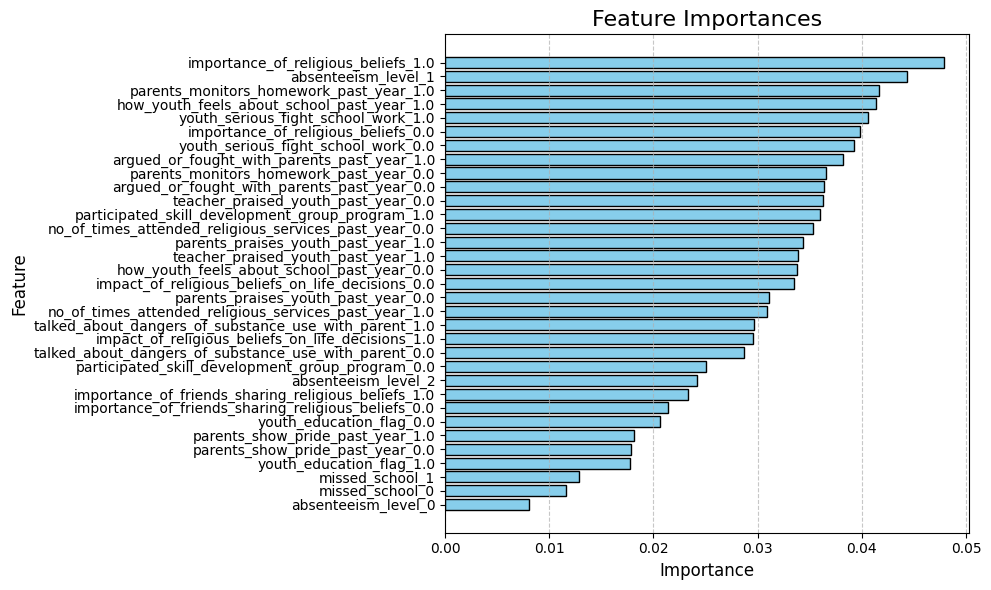

In [1025]:
feature_importances = gb_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importances', fontsize=16)
 # Inverting y-axis to show most important features at the top
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In [1026]:
# Function to convert specified columns to 'category' dtype
def convert_to_category(dataframe, col_names):

    dataframe[col] = dataframe[col].astype('category')
    return dataframe

#function to convert categorical variable into one hot encoded values
def one_hot_encoding(dataframe, col_name):
    dummy = pd.get_dummies(dataframe[[col_name]])
    res = pd.concat([dataframe, dummy ], axis=1)
    res.drop(col_name,inplace = True,axis = 1)
    return(res)

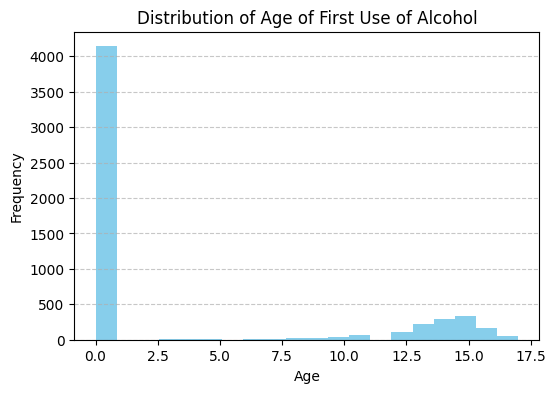

age_of_first_alcohol_use
991.0    4138
15.0      329
14.0      291
13.0      225
16.0      166
12.0      112
11.0       61
17.0       57
10.0       36
9.0        21
8.0        19
7.0        17
6.0         9
5.0         6
3.0         5
4.0         5
2.0         2
1.0         1
Name: count, dtype: int64

In [1027]:
# @title regression problem
df_reg = df_bc.copy()

df_reg[['marijuana_ever_tried_flag', 'tobacco_ever_tried_flag', 'substance_use_flag']] = df_imputed[['marijuana_ever_tried_flag', 'tobacco_ever_tried_flag', 'substance_use_flag']]

# Replacing extreme value (e.g., 991) with 0 for clarity
df_reg['age_of_first_alcohol_use'] = df_imputed['age_of_first_alcohol_use'].replace([991], 0)

plt.figure(figsize=(6, 4))
df_reg['age_of_first_alcohol_use'].hist(grid=False, color='skyblue', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age of First Use of Alcohol')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
df_imputed['age_of_first_alcohol_use'].value_counts()

The data shows that some responded age as 1-7 for alcohol use, that doesn't seem right and can affect the model. Let's modify that to 7

In [1028]:
# replace values 1-6 with 7 in the 'age_first_alcohol_age' column
df_reg['age_of_first_alcohol_use'] = df_reg['age_of_first_alcohol_use'].replace([1, 2, 3, 4, 5, 6], 7)

In [1029]:
df_reg['age_of_first_alcohol_use'].value_counts()

# df_reg[['marijuana_ever_tried_flag', 'tobacco_ever_tried_flag']] = df_imputed[['marijuana_ever_tried_flag', 'tobacco_ever_tried_flag']]

for col in ['marijuana_ever_tried_flag', 'tobacco_ever_tried_flag', 'alcohol_ever_tried_flag']:
    convert_to_category(df_reg,col)
    df_reg= one_hot_encoding(df_reg,col)
# df_imputed[['marijuana_ever_tried_flag', 'tobacco_ever_tried_flag']]

In [1030]:
df_reg.columns

Index(['how_youth_feels_about_school_past_year_0.0',
       'how_youth_feels_about_school_past_year_1.0',
       'teacher_praised_youth_past_year_0.0',
       'teacher_praised_youth_past_year_1.0', 'youth_education_flag_0.0',
       'youth_education_flag_1.0',
       'talked_about_dangers_of_substance_use_with_parent_0.0',
       'talked_about_dangers_of_substance_use_with_parent_1.0',
       'participated_skill_development_group_program_0.0',
       'participated_skill_development_group_program_1.0',
       'no_of_times_attended_religious_services_past_year_0.0',
       'no_of_times_attended_religious_services_past_year_1.0',
       'importance_of_religious_beliefs_0.0',
       'importance_of_religious_beliefs_1.0',
       'impact_of_religious_beliefs_on_life_decisions_0.0',
       'impact_of_religious_beliefs_on_life_decisions_1.0',
       'importance_of_friends_sharing_religious_beliefs_0.0',
       'importance_of_friends_sharing_religious_beliefs_1.0',
       'parents_praises_youth

In [1031]:
X = df_reg[df_reg.columns.difference(['age_of_first_alcohol_use'])]
y = df_reg['age_of_first_alcohol_use']
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X, y)

tree_summary = export_text(dt_reg, feature_names=X.columns.tolist())
importances = pd.DataFrame({'feature_name': X.columns, 'importance': dt_reg.feature_importances_})
importances = importances.sort_values('importance', ascending=False).reset_index(drop=True)
print(importances)
# plt.figure(figsize=(50,50))
# plot_tree(dt_reg
#           , filled=True
#           , feature_names=X.columns
#           #, class_names=[0, 1]
#           , label='all'
#           , fontsize=12)
# plt.show()

                                         feature_name  importance
0                         alcohol_ever_tried_flag_0.0    0.972120
1                 youth_serious_fight_school_work_0.0    0.001562
2                 teacher_praised_youth_past_year_0.0    0.001503
3          how_youth_feels_about_school_past_year_1.0    0.001315
4             parents_monitors_homework_past_year_1.0    0.001223
5   impact_of_religious_beliefs_on_life_decisions_0.0    0.001170
6          how_youth_feels_about_school_past_year_0.0    0.001123
7   no_of_times_attended_religious_services_past_y...    0.001082
8                       marijuana_ever_tried_flag_1.0    0.001065
9   no_of_times_attended_religious_services_past_y...    0.001047
10                      marijuana_ever_tried_flag_0.0    0.001002
11                teacher_praised_youth_past_year_1.0    0.000992
12                        tobacco_ever_tried_flag_1.0    0.000920
13                                    missed_school_1    0.000830
14  import

Let's try different models

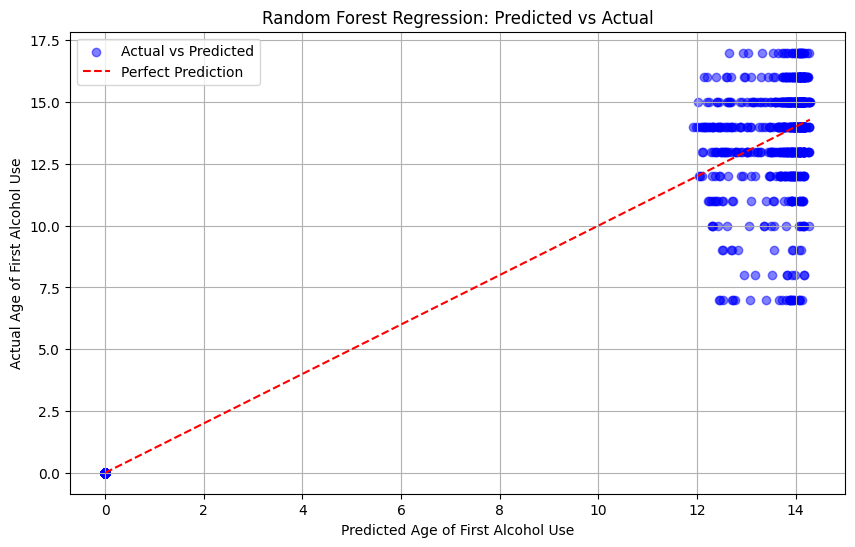

Mean Squared Error: 1.15


In [1032]:
# @title Random Forest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state= 1, stratify=y)

rf_classifier = RandomForestRegressor(n_estimators=3500, max_depth=4, random_state=1)

# fit Random Forest model
rf_classifier.fit(X_train, y_train)

# predict on test data
y_pred = rf_classifier.predict(X_test)

# plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.5, color='blue', label='Actual vs Predicted')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r--', label='Perfect Prediction')
plt.xlabel('Predicted Age of First Alcohol Use')
plt.ylabel('Actual Age of First Alcohol Use')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# find the MSE
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

Number of trees: 100
Number of features tried at each split: 40
Training score: 99.26%
Accuracy: 96.18%


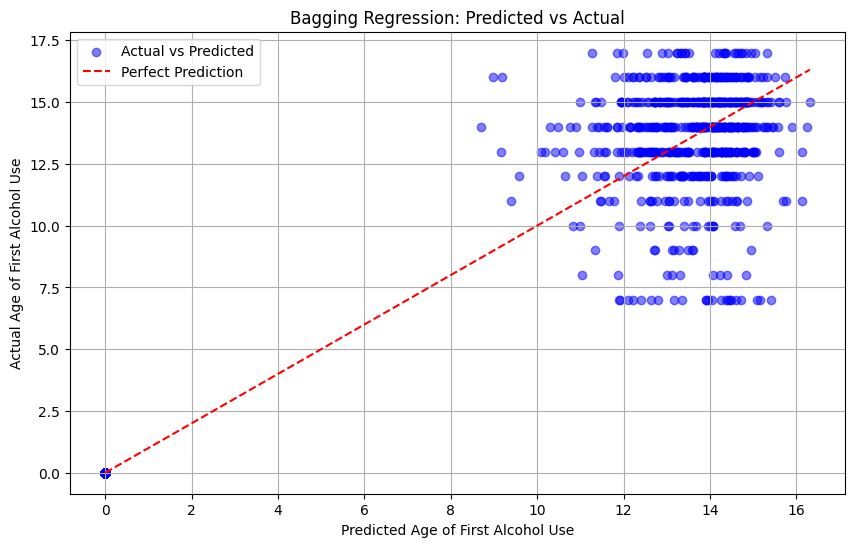

Mean Squared Error: 1.37


In [1033]:
bag_reg = RandomForestRegressor(max_features=X_train.shape[1],random_state = 1)
bag_reg.fit(X_train,y_train)

print("Number of trees:", bag_reg.n_estimators)
print("Number of features tried at each split:",bag_reg.max_features)
print("Training score: {:.2f}%".format(bag_reg.score(X_train,y_train)*100))

# Predict values
y_pred = bag_reg.predict(X_test)

accuracy = bag_reg.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))


# plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.5, color='blue', label='Actual vs Predicted')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r--', label='Perfect Prediction')
plt.xlabel('Predicted Age of First Alcohol Use')
plt.ylabel('Actual Age of First Alcohol Use')
plt.title('Bagging Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# find the MSE
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

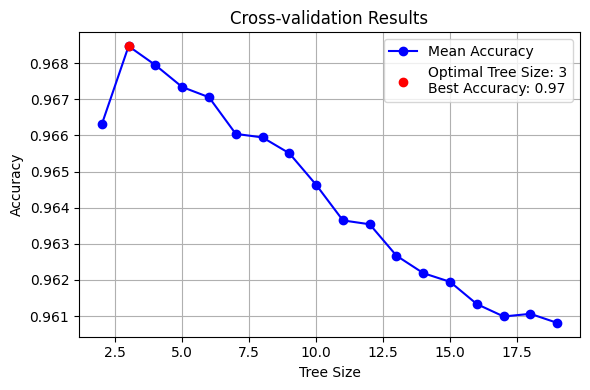

Optimal Tree Size: 3
Best Accuracy: 0.9684683066535866


In [1034]:
# @title Find optimal tree size

tree_classifier = DecisionTreeRegressor(random_state= 1)

# Define the parameters to search over
params = {'max_leaf_nodes': range(2, 20)}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=params, cv=10)
grid_search.fit(X_train, y_train)

# Get the results of cross-validation
cv_results = grid_search.cv_results_

# Find the best tree size
best_size = grid_search.best_params_['max_leaf_nodes']
best_score = grid_search.best_score_

# Plot the cross-validation results with enhanced style
plt.figure(figsize=(6, 4))
plt.plot(cv_results["param_max_leaf_nodes"], cv_results["mean_test_score"], 'o-', color='b', label='Mean Accuracy')
plt.plot(best_size, best_score, 'ro', label=f'Optimal Tree Size: {best_size}\nBest Accuracy: {best_score:.2f}')
plt.xlabel('Tree Size')
plt.ylabel('Accuracy')
plt.title('Cross-validation Results')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Optimal Tree Size:", best_size)
print("Best Accuracy:", best_score)

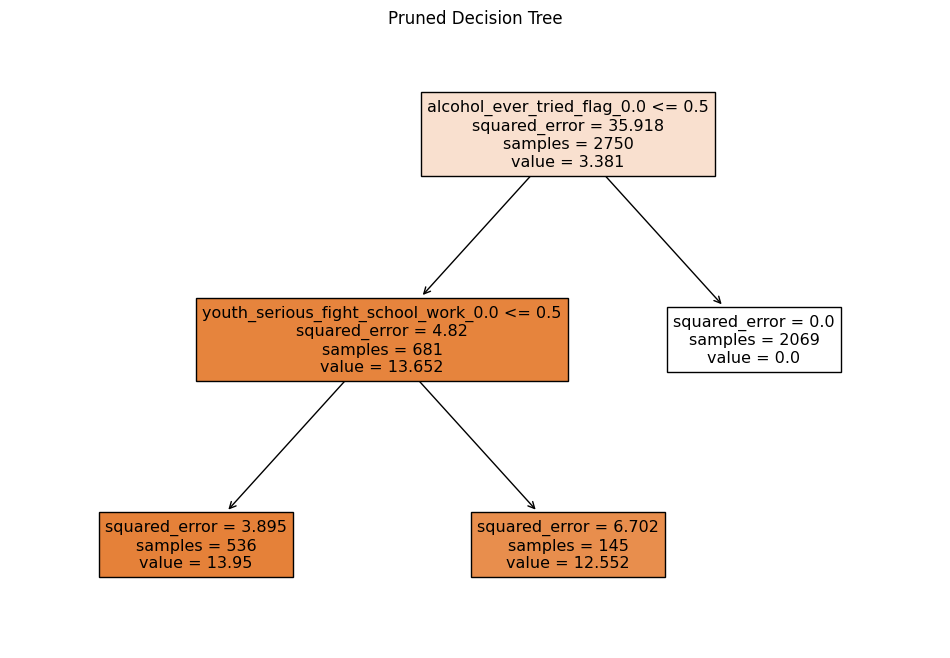

In [1042]:
# @title Creating pruned tree using the optimal size
from sklearn.tree import plot_tree

# Create the pruned decision tree classifier
pruned_tree = DecisionTreeRegressor(max_leaf_nodes=best_size, random_state=42)
pruned_tree.fit(X_train, y_train)
y_pred = pruned_tree.predict(X_test)
# Plot the pruned decision tree/
plt.figure(figsize=(12, 8))
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
plt.title('Pruned Decision Tree')
plt.show()

In [1036]:
accuracy = pruned_tree.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))


Accuracy: 96.76%


In [1037]:
# @title gradient boosting

# fit Gradient Boosting model
boost_reg = GradientBoostingRegressor(n_estimators=5000, max_depth=4
                                         , random_state=1)
boost_reg.fit(X_train, y_train)

# create a dataframe of feature importances and their corresponding column names
importances_boost_reg = pd.DataFrame({'Feature': X_train.columns, 'Importance': boost_reg.feature_importances_})
importances_boost_reg = importances_boost_reg.sort_values('Importance', ascending=False).reset_index(drop=True)

# display the table
print(importances_boost_reg)

                                              Feature  Importance
0                         alcohol_ever_tried_flag_1.0    0.682355
1                         alcohol_ever_tried_flag_0.0    0.293377
2                 youth_serious_fight_school_work_0.0    0.001692
3                 youth_serious_fight_school_work_1.0    0.001489
4                                 absenteeism_level_1    0.000810
5                 teacher_praised_youth_past_year_0.0    0.000789
6                         tobacco_ever_tried_flag_0.0    0.000779
7                 importance_of_religious_beliefs_0.0    0.000748
8         argued_or_fought_with_parents_past_year_0.0    0.000738
9                 importance_of_religious_beliefs_1.0    0.000720
10  impact_of_religious_beliefs_on_life_decisions_1.0    0.000710
11  no_of_times_attended_religious_services_past_y...    0.000687
12         how_youth_feels_about_school_past_year_0.0    0.000682
13        argued_or_fought_with_parents_past_year_1.0    0.000680
14        

Accuracy: 94.43%


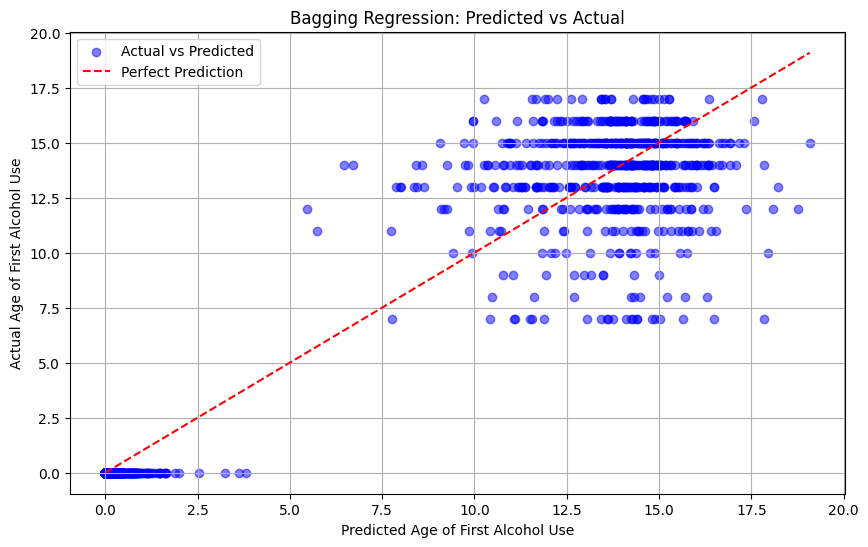

Mean Squared Error: 1.91


In [1044]:
# Predict values
y_pred = boost_reg.predict(X_test)
y_pred = np.clip(y_pred, 0, 365)
accuracy = boost_reg.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))


# plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.5, color='blue', label='Actual vs Predicted')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], 'r--', label='Perfect Prediction')
plt.xlabel('Predicted Age of First Alcohol Use')
plt.ylabel('Actual Age of First Alcohol Use')
plt.title('Bagging Regression: Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()

# find the MSE
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

 the model seems to be a good fit for the data, as evidenced by the clustering of points near the perfect prediction line and a relatively low MSE.